In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from google.colab import drive
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import os

In [ ]:
# Đường dẫn tới file trên Google Drive
train_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_train.csv'
test_file_path = '/content/drive/MyDrive/LuanVan/data/ComVN30_test.csv'
# Đọc dữ liệu
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [ ]:
class StockModelEvaluation:
    def __init__(self):
        self.results = []

    def fit_and_predict(self, model, train_df, test_df, ticker):
        # Huấn luyện mô hình với dữ liệu train
        model.fit(train_df)

        # Dự đoán với tập test
        future = test_df[['ds']]
        forecast = model.predict(future)

        # Điều chỉnh giá trị dự đoán
        last_train_value = train_df['y'].iloc[-1]
        first_forecast_value = forecast['yhat'].iloc[0]
        adjustment = last_train_value - first_forecast_value
        forecast['yhat_adjusted'] = forecast['yhat'] + adjustment
        forecast['yhat_upper_adjusted'] = forecast['yhat_upper'] + adjustment
        forecast['yhat_lower_adjusted'] = forecast['yhat_lower'] + adjustment

        # Tính toán MAE và RMSE
        y_true = test_df['y'].values
        y_pred = forecast['yhat_adjusted'].values

        mae = round(mean_absolute_error(y_true, y_pred), 2)
        rmse = round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)

        print(f'Ticker: {ticker}, MAE: {mae}, RMSE: {rmse}')

        # Lưu kết quả
        self.results.append({
            'ticker': ticker,
            'mae': mae,
            'rmse': rmse,
            'seasonality_mode': model.seasonality_mode
        })

        # Trả về dự báo đã điều chỉnh và thang đo đánh giá
        return forecast

    def plot_forecast(self, train_df, forecast, test_df, ticker, seasonality_mode):
        # Xác định xu hướng dự đoán
        start_value = forecast['yhat_adjusted'].iloc[0]
        end_value = forecast['yhat_adjusted'].iloc[-1]
        trend = 'up' if end_value > start_value else 'down' if end_value < start_value else 'stable'

        # Tên file ảnh
        title = f'{seasonality_mode.capitalize()} Prophet_{ticker}: Trend {trend}'
        filename = title.replace(" ", "").replace(":", "_").replace(",", "") + '.png'
        file_path = os.path.join('/content/drive/MyDrive/LuanVan/results/FB_Prophet/', filename)

        # Vẽ biểu đồ
        plt.figure(figsize=(10, 6))
        plt.plot(train_df['ds'], train_df['y'], label='Train', color='blue')
        plt.plot(forecast['ds'], forecast['yhat_adjusted'], label='Prediction', color='orange')
        plt.fill_between(forecast['ds'], forecast['yhat_lower_adjusted'], forecast['yhat_upper_adjusted'], color='orange', alpha=0.2)
        plt.plot(test_df['ds'], test_df['y'], label='Test', color='green')
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()

        # Lưu biểu đồ vào file
        plt.savefig(file_path)
        plt.close()

    def get_results(self, seasonality_mode):
        # Lọc kết quả theo seasonality_mode
        filtered_results = [result for result in self.results if result['seasonality_mode'] == seasonality_mode]
        results_df = pd.DataFrame(filtered_results)

        # Tính toán trung bình MAE và RMSE
        avg_mae = round(results_df['mae'].mean(), 2)
        avg_rmse = round(results_df['rmse'].mean(), 2)

        print(f'Average MAE ({seasonality_mode.capitalize()}): {avg_mae}, Average RMSE ({seasonality_mode.capitalize()}): {avg_rmse}')

        # Lưu kết quả vào tệp CSV
        csv_path = f'/content/drive/MyDrive/LuanVan/results/FB_Prophet/Prophet_results_{seasonality_mode}.csv'
        results_df.to_csv(csv_path, index=False)

        return results_df, avg_mae, avg_rmse


In [ ]:
# Chuyển đổi cột 'time' sang định dạng datetime
train_df['time'] = pd.to_datetime(train_df['time'])
test_df['time'] = pd.to_datetime(test_df['time'])

# Tạo đối tượng StockModelEvaluation
evaluator_additive = StockModelEvaluation()
evaluator_multiplicative = StockModelEvaluation()

# Lấy danh sách các mã chứng khoán
tickers = train_df['ticker'].unique()

## Additive

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9f9pd808.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_d7inkeq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62191', 'data', 'file=/tmp/tmp5rkaockg/9f9pd808.json', 'init=/tmp/tmp5rkaockg/_d7inkeq.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelcm09xgc_/prophet_model-20240803162029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSI


16:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 1531.85, RMSE: 1783.62


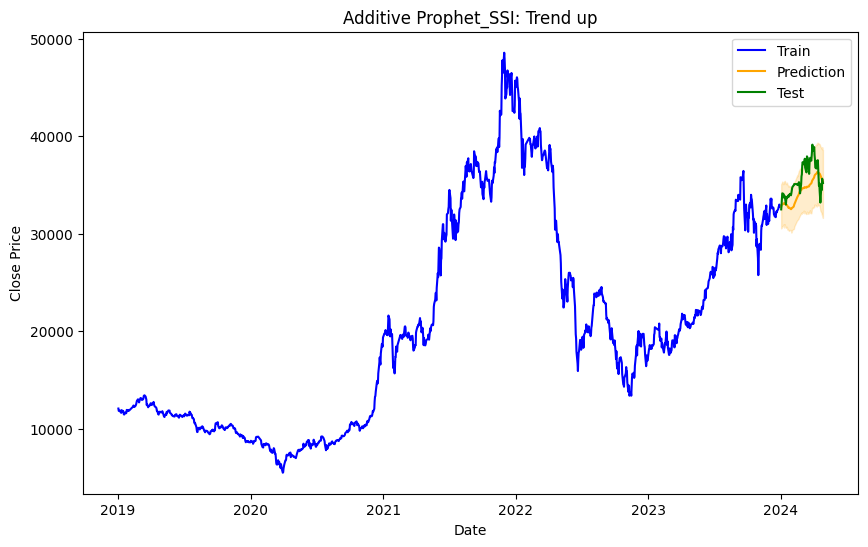

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/06zu4lni.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/1y397ima.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77188', 'data', 'file=/tmp/tmp5rkaockg/06zu4lni.json', 'init=/tmp/tmp5rkaockg/1y397ima.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelygc7rnm9/prophet_model-20240803162030.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BCM


16:20:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3813.82, RMSE: 4323.65


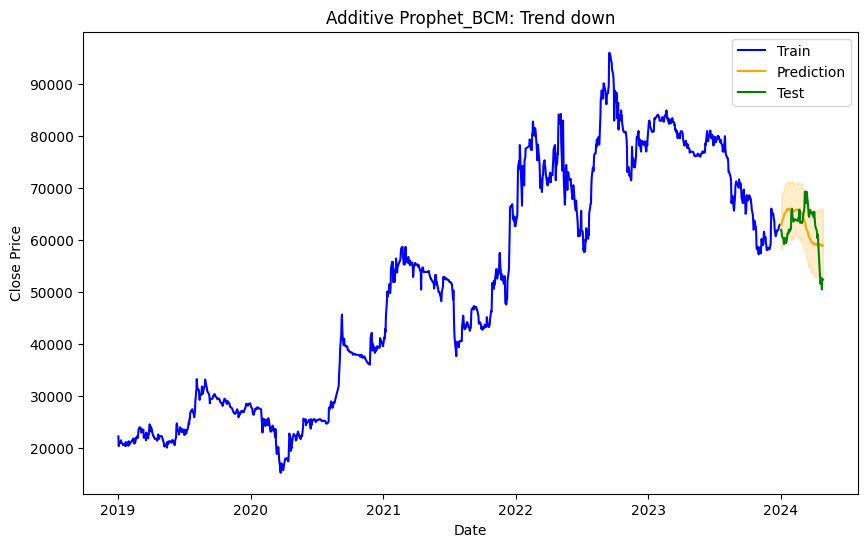

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/jkvfyt8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/b7wdl670.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62288', 'data', 'file=/tmp/tmp5rkaockg/jkvfyt8u.json', 'init=/tmp/tmp5rkaockg/b7wdl670.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model4tmggodk/prophet_model-20240803162031.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VHM


16:20:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1301.49, RMSE: 1651.37


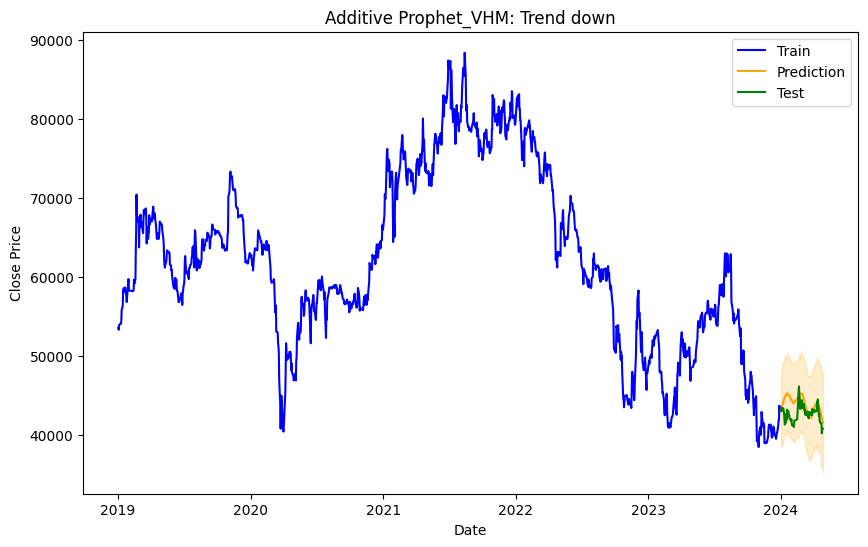

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/e0oe3zie.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/kcm9neiq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72621', 'data', 'file=/tmp/tmp5rkaockg/e0oe3zie.json', 'init=/tmp/tmp5rkaockg/kcm9neiq.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0ovc4pl9/prophet_model-20240803162032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VIC


16:20:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 3834.42, RMSE: 4917.44


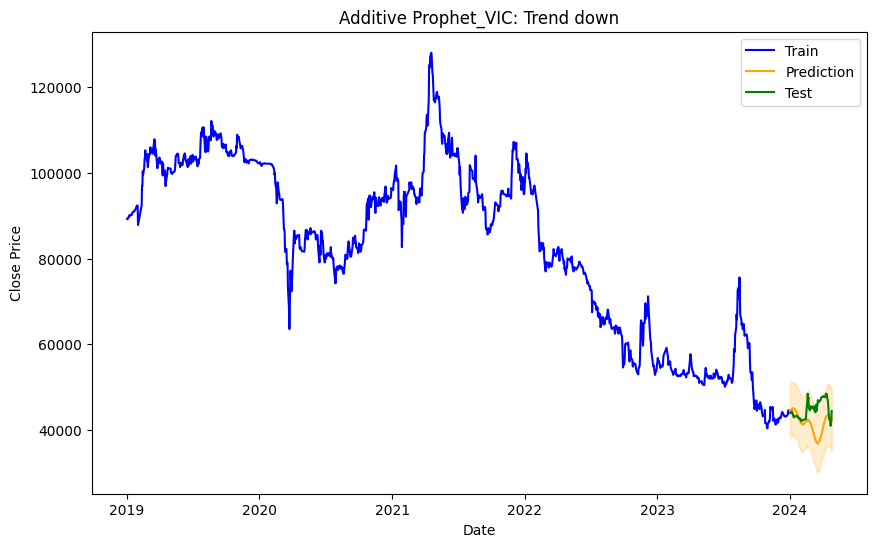

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/zjip3g98.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/lajsykv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33217', 'data', 'file=/tmp/tmp5rkaockg/zjip3g98.json', 'init=/tmp/tmp5rkaockg/lajsykv6.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelai_qca14/prophet_model-20240803162033.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VRE


16:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1686.07, RMSE: 1976.67


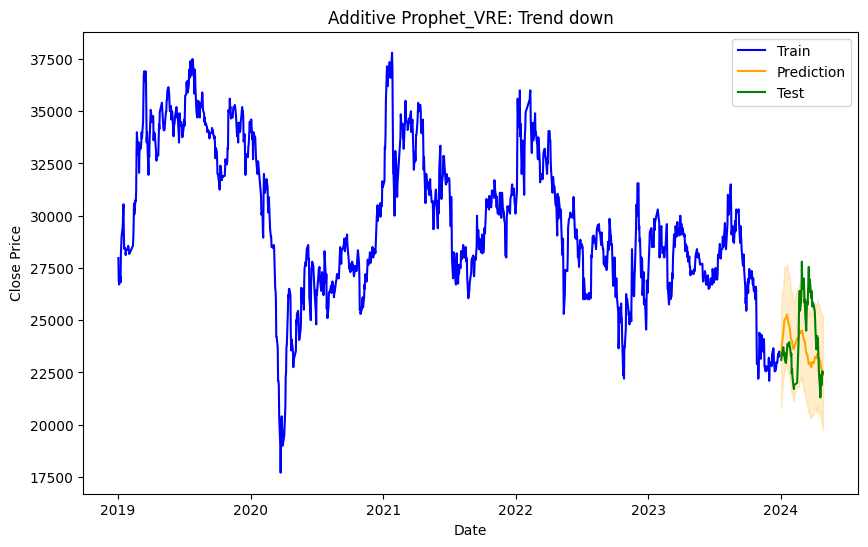

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vxui4h__.json


Processing ticker (Additive): BVH


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7f88hua2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11528', 'data', 'file=/tmp/tmp5rkaockg/vxui4h__.json', 'init=/tmp/tmp5rkaockg/7f88hua2.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model5x718ixd/prophet_model-20240803162035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3427.81, RMSE: 3956.37


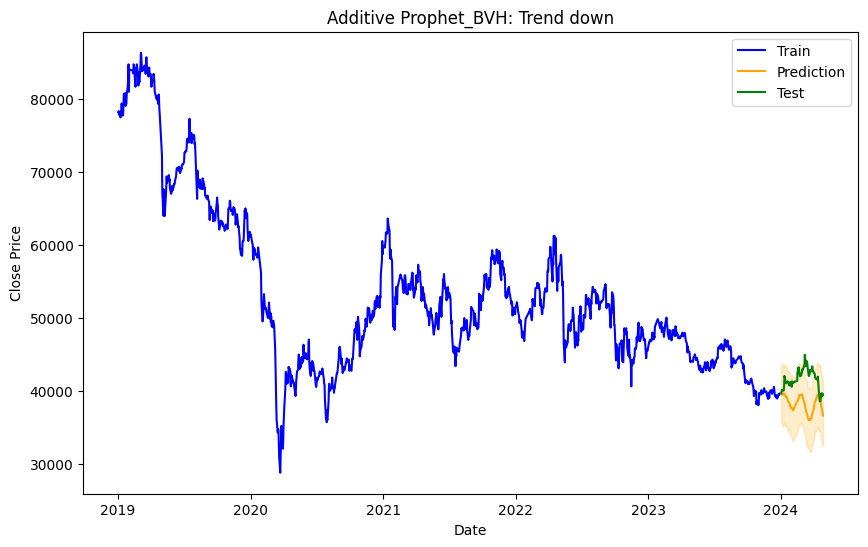

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gtbsgkch.json


Processing ticker (Additive): POW


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/u_j0cokr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17101', 'data', 'file=/tmp/tmp5rkaockg/gtbsgkch.json', 'init=/tmp/tmp5rkaockg/u_j0cokr.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modela2t75ezj/prophet_model-20240803162037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 189.98, RMSE: 244.24


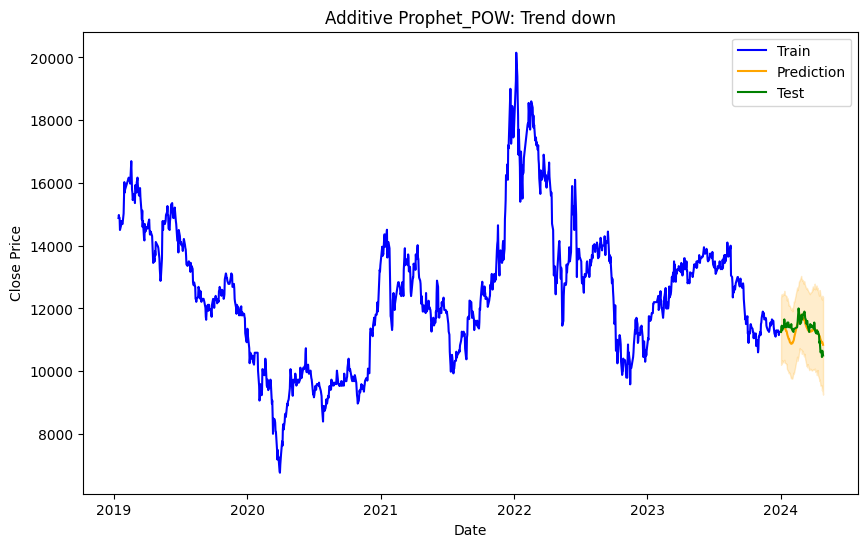

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/cvkulz3_.json


Processing ticker (Additive): GAS


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/3qf8027p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19953', 'data', 'file=/tmp/tmp5rkaockg/cvkulz3_.json', 'init=/tmp/tmp5rkaockg/3qf8027p.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeljc_p0xu6/prophet_model-20240803162039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4600.38, RMSE: 6024.8


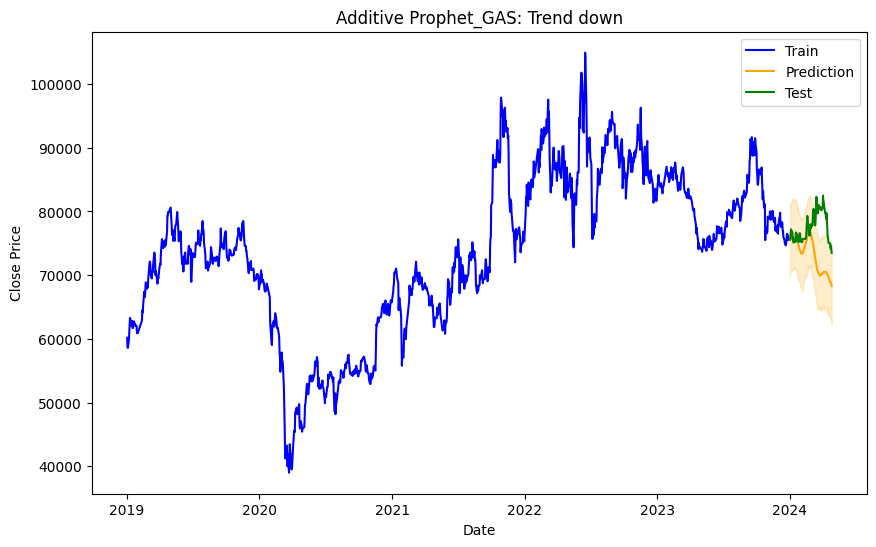

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/nf_1gqbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9w6cdmk8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29989', 'data', 'file=/tmp/tmp5rkaockg/nf_1gqbh.json', 'init=/tmp/tmp5rkaockg/9w6cdmk8.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeluxuiuzem/prophet_model-20240803162040.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): ACB


16:20:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 2142.07, RMSE: 2259.26


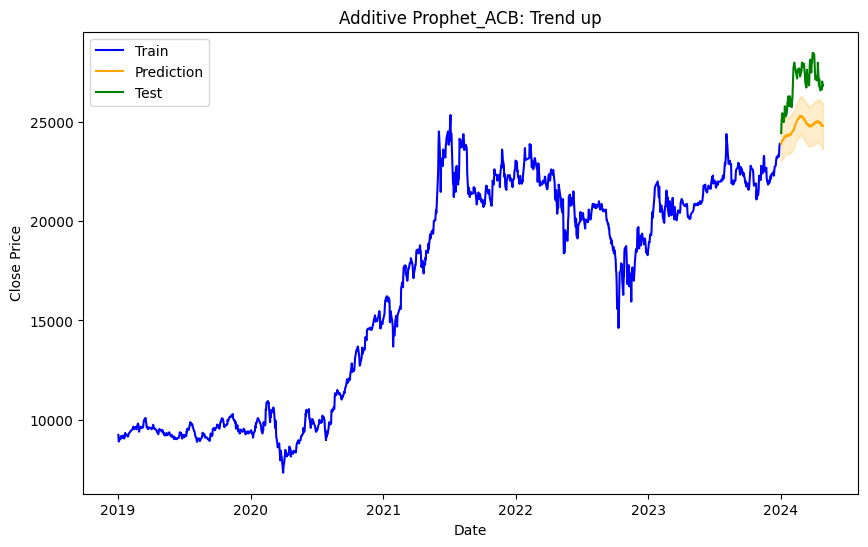

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/lb1omd94.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/c7wdwrcu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36969', 'data', 'file=/tmp/tmp5rkaockg/lb1omd94.json', 'init=/tmp/tmp5rkaockg/c7wdwrcu.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model3ywvhdge/prophet_model-20240803162041.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): BID


16:20:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 4879.13, RMSE: 5675.99


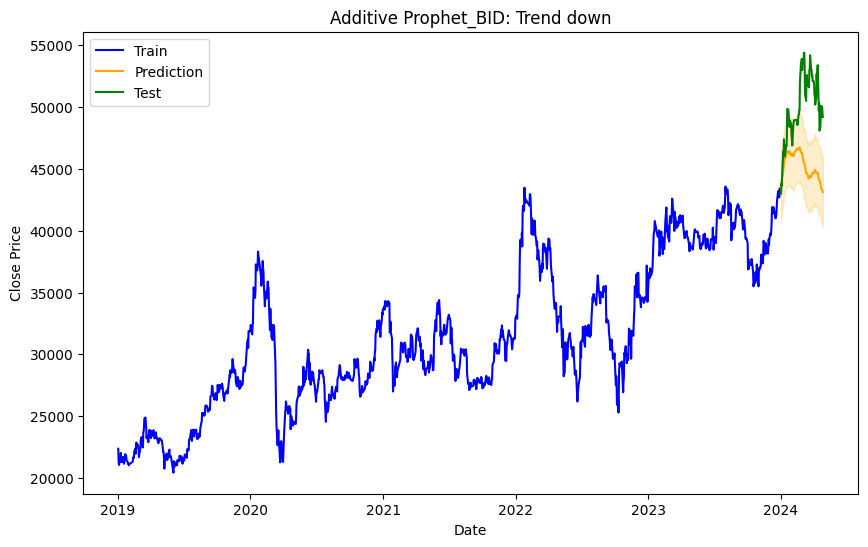

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/apvrh4o1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5vw66cdh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36044', 'data', 'file=/tmp/tmp5rkaockg/apvrh4o1.json', 'init=/tmp/tmp5rkaockg/5vw66cdh.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model6g0whg7l/prophet_model-20240803162042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): CTG


16:20:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5226.09, RMSE: 5538.13


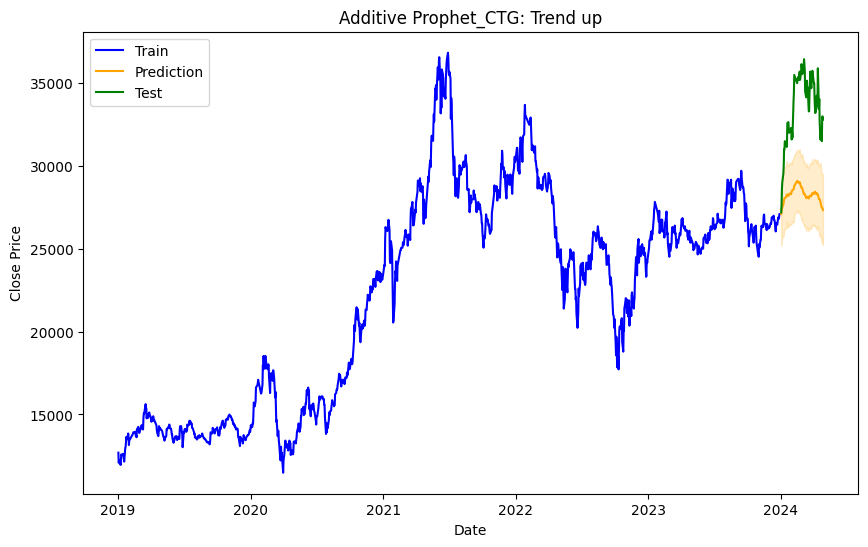

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/iyz_yjbs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_q8t5z68.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77486', 'data', 'file=/tmp/tmp5rkaockg/iyz_yjbs.json', 'init=/tmp/tmp5rkaockg/_q8t5z68.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelkz1e6703/prophet_model-20240803162043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): HDB


16:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1587.3, RMSE: 1850.21


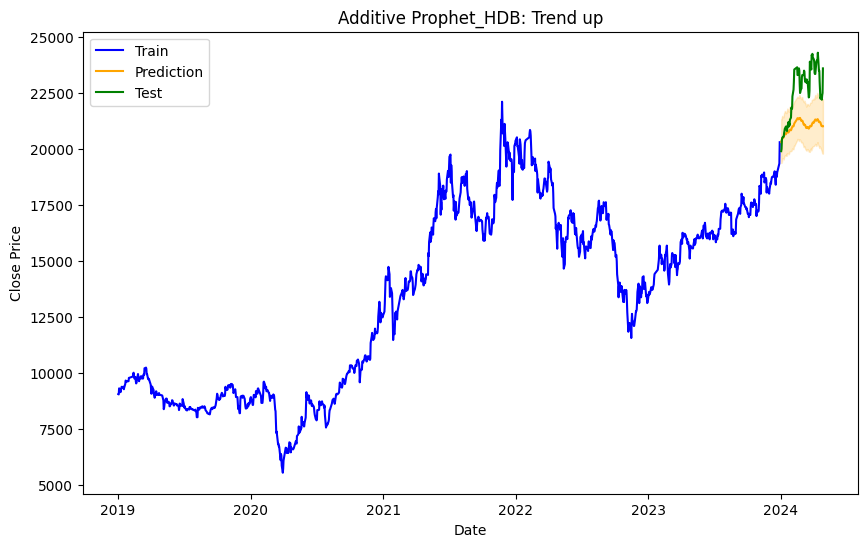

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/693ws3m2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/ny7u2x7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21575', 'data', 'file=/tmp/tmp5rkaockg/693ws3m2.json', 'init=/tmp/tmp5rkaockg/ny7u2x7n.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelu2w71bo9/prophet_model-20240803162044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MBB


16:20:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3432.73, RMSE: 3652.41


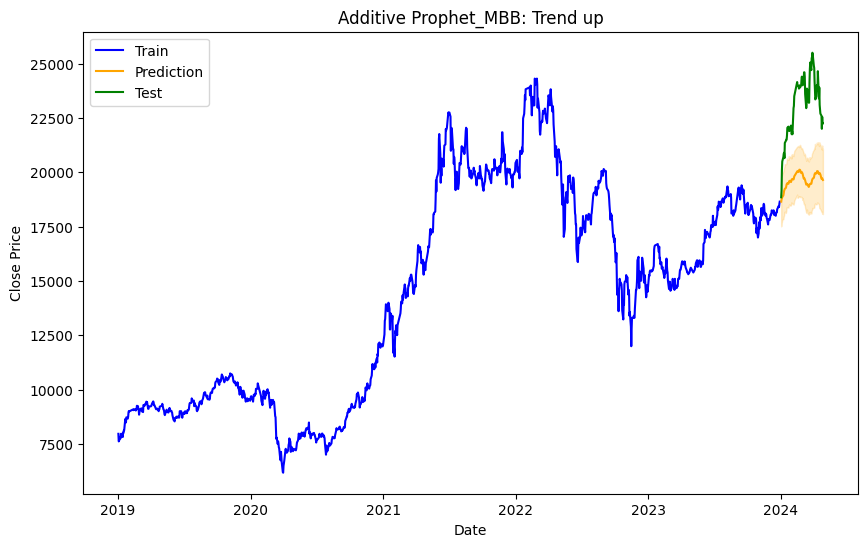

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/yw7bv14d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/3_dlyaas.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43925', 'data', 'file=/tmp/tmp5rkaockg/yw7bv14d.json', 'init=/tmp/tmp5rkaockg/3_dlyaas.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelrcqzw13m/prophet_model-20240803162045.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SSB


16:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1081.33, RMSE: 1199.97


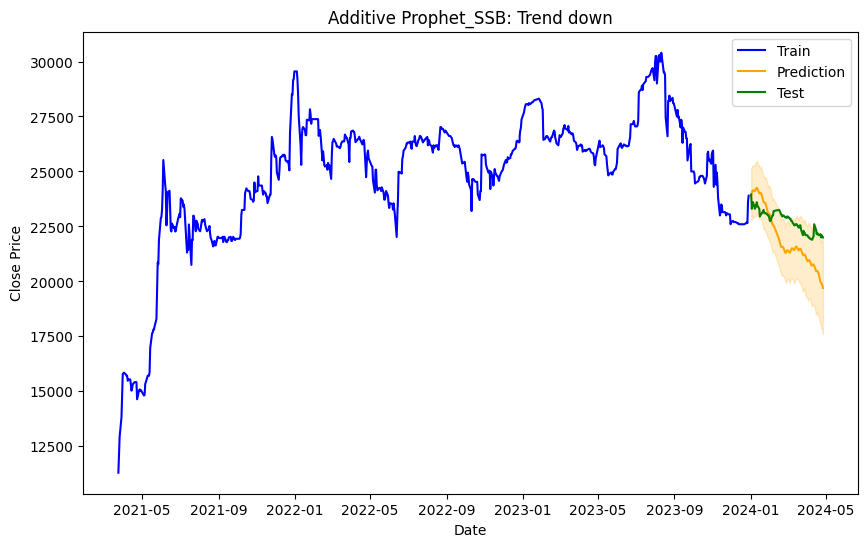

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/je_oa73t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/6dkhe9iv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52186', 'data', 'file=/tmp/tmp5rkaockg/je_oa73t.json', 'init=/tmp/tmp5rkaockg/6dkhe9iv.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelqlfxgt8d/prophet_model-20240803162046.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SHB


16:20:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1062.76, RMSE: 1257.87


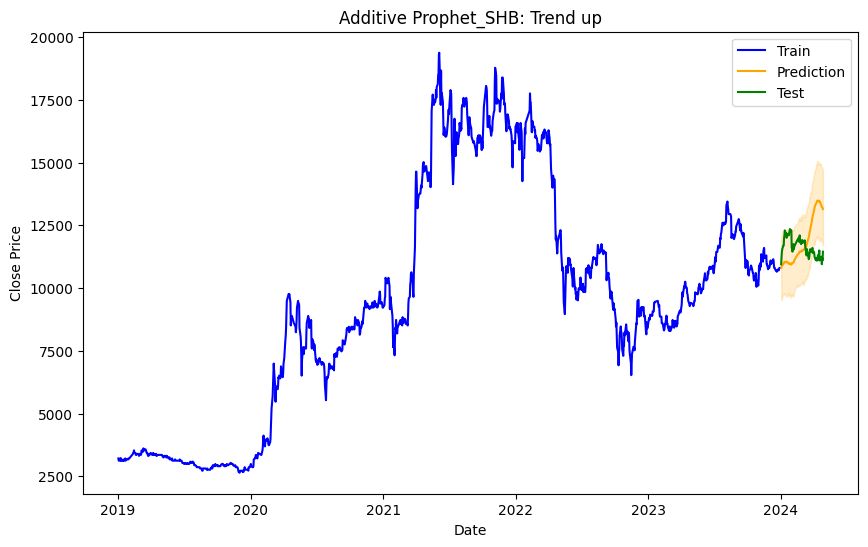

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vj66i65r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/3aqwv0uq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81132', 'data', 'file=/tmp/tmp5rkaockg/vj66i65r.json', 'init=/tmp/tmp5rkaockg/3aqwv0uq.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelgthenxvj/prophet_model-20240803162048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): STB


16:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 938.67, RMSE: 1505.47


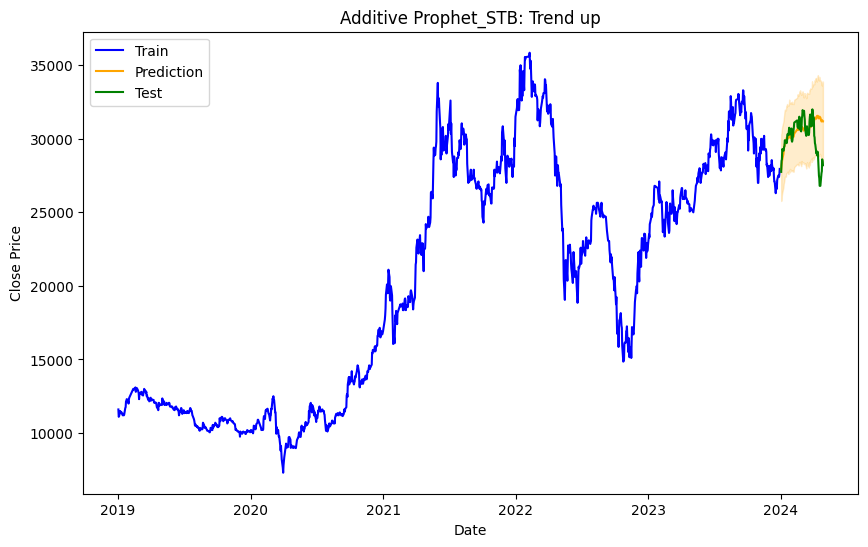

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/y6nmtplx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/hnkezde5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70689', 'data', 'file=/tmp/tmp5rkaockg/y6nmtplx.json', 'init=/tmp/tmp5rkaockg/hnkezde5.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeljtiute9q/prophet_model-20240803162049.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): TCB


16:20:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 6794.14, RMSE: 8229.12


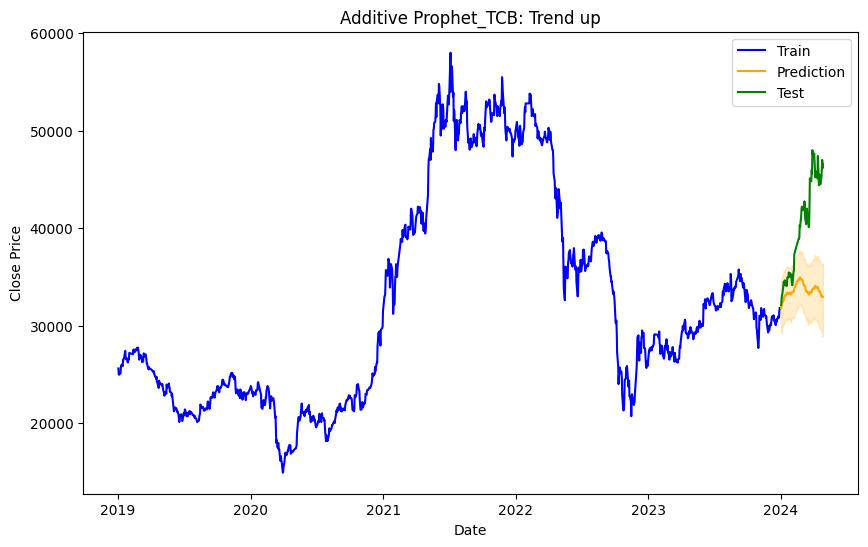

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mifn67e9.json


Processing ticker (Additive): TPB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9asa5ml7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17839', 'data', 'file=/tmp/tmp5rkaockg/mifn67e9.json', 'init=/tmp/tmp5rkaockg/9asa5ml7.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelfnw1o3r7/prophet_model-20240803162050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 629.38, RMSE: 754.85


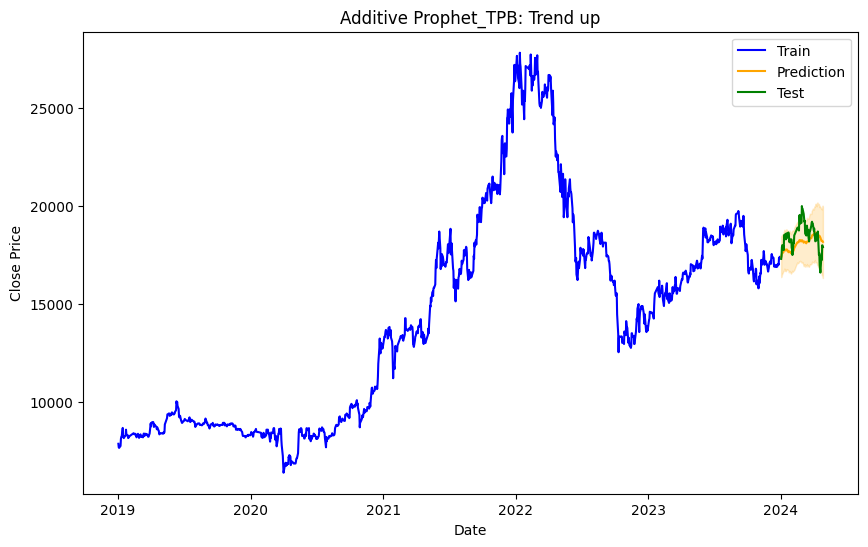

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/97f_5nki.json


Processing ticker (Additive): VCB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/2ncj6wjf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17625', 'data', 'file=/tmp/tmp5rkaockg/97f_5nki.json', 'init=/tmp/tmp5rkaockg/2ncj6wjf.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelvgenkdve/prophet_model-20240803162052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6204.44, RMSE: 6837.74


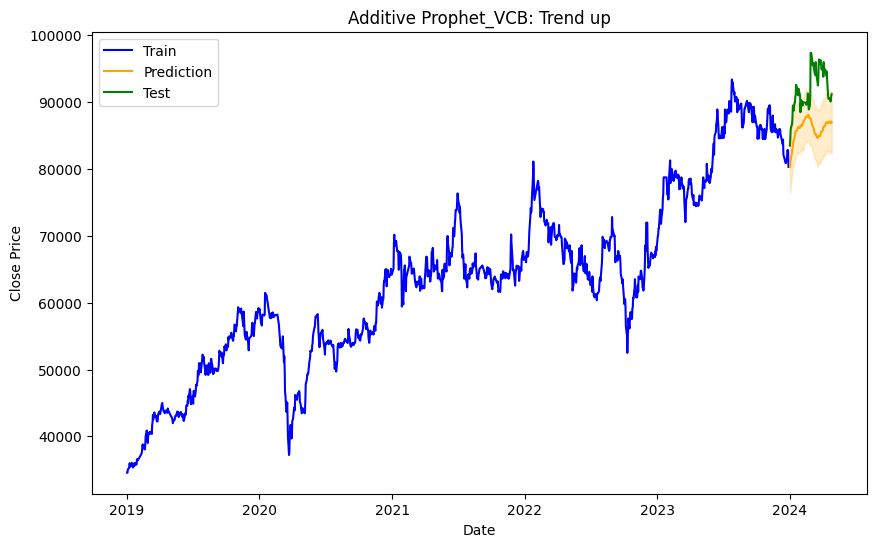

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/y_ijtm2d.json


Processing ticker (Additive): VIB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/r16iza0i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32504', 'data', 'file=/tmp/tmp5rkaockg/y_ijtm2d.json', 'init=/tmp/tmp5rkaockg/r16iza0i.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelipr6px3j/prophet_model-20240803162054.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1902.74, RMSE: 2130.19


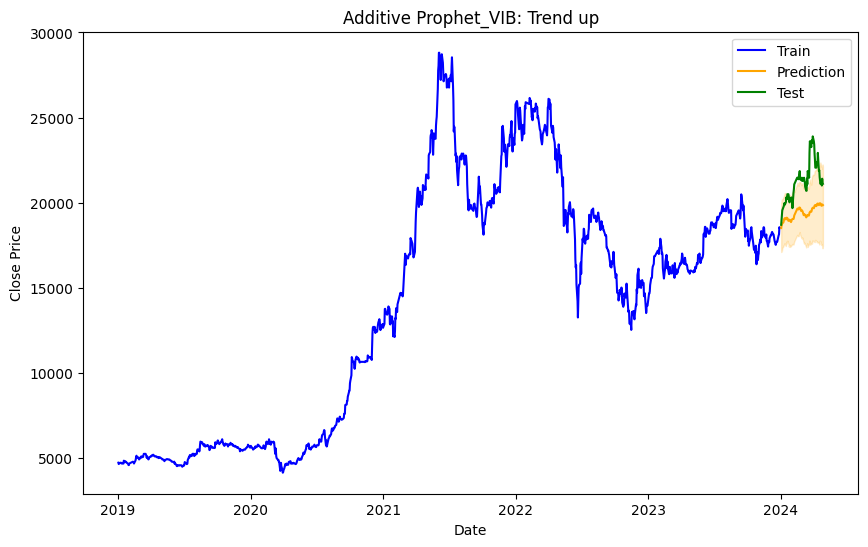

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9787czam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/p14olbeb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57268', 'data', 'file=/tmp/tmp5rkaockg/9787czam.json', 'init=/tmp/tmp5rkaockg/p14olbeb.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelfb87dkih/prophet_model-20240803162055.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VPB


16:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1110.4, RMSE: 1362.79


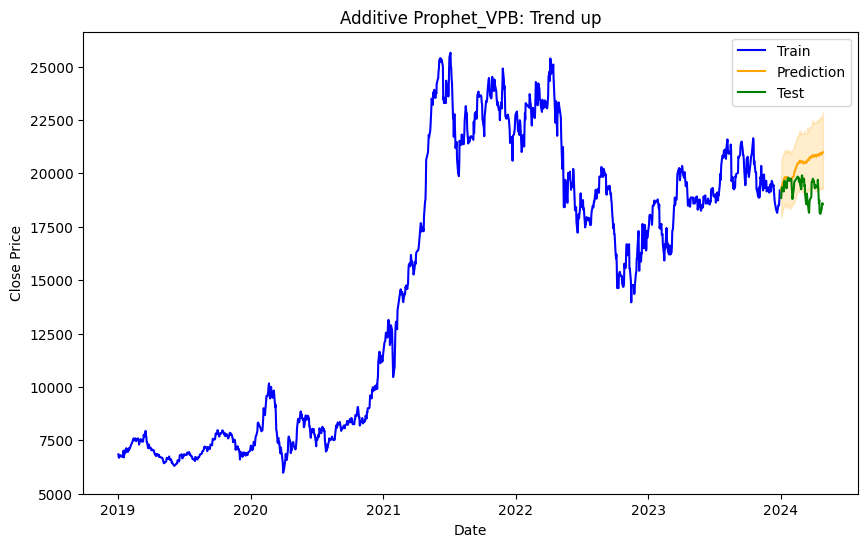

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/h4xerox0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_70d7v6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88440', 'data', 'file=/tmp/tmp5rkaockg/h4xerox0.json', 'init=/tmp/tmp5rkaockg/_70d7v6h.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model7vd87dov/prophet_model-20240803162057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): HPG


16:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 868.07, RMSE: 1250.62


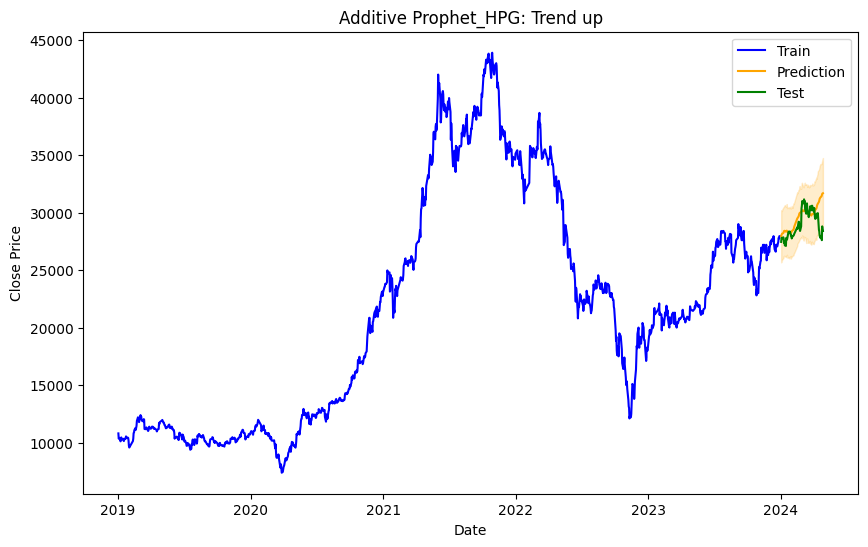

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/kqg2u0lf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/wdjqjd2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11001', 'data', 'file=/tmp/tmp5rkaockg/kqg2u0lf.json', 'init=/tmp/tmp5rkaockg/wdjqjd2a.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelr4l1kxad/prophet_model-20240803162058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): GVR


16:20:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 6383.91, RMSE: 7611.93


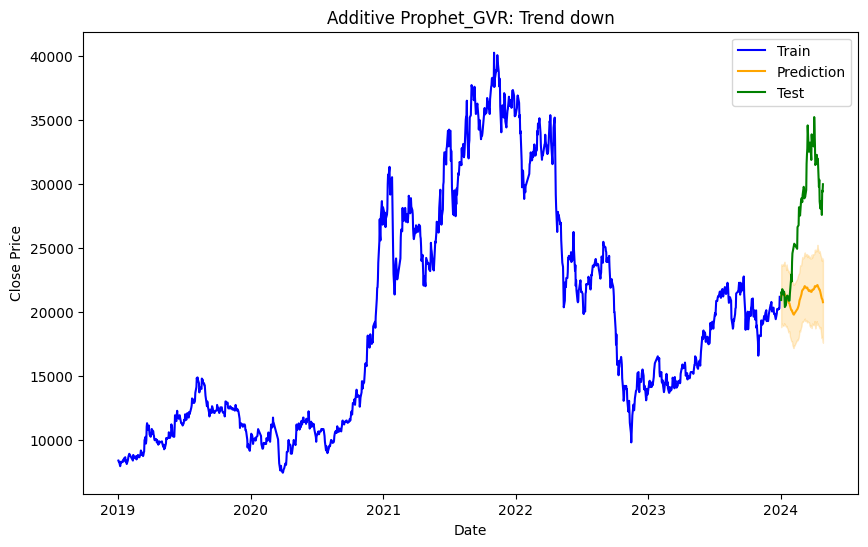

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/im9_k3ly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mubw16ai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77498', 'data', 'file=/tmp/tmp5rkaockg/im9_k3ly.json', 'init=/tmp/tmp5rkaockg/mubw16ai.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model9lmhvn6c/prophet_model-20240803162059.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MSN


16:21:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 11264.48, RMSE: 13754.37


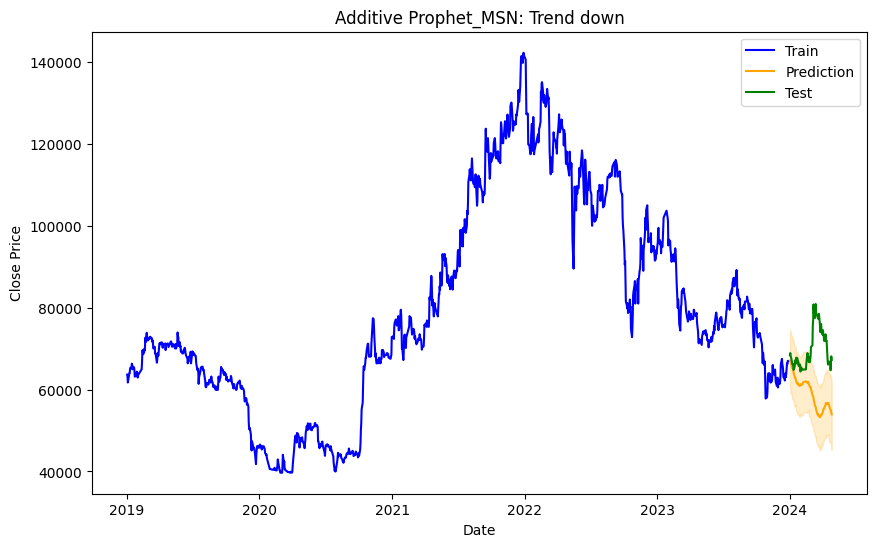

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/l8mo5bky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/k521vq56.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6751', 'data', 'file=/tmp/tmp5rkaockg/l8mo5bky.json', 'init=/tmp/tmp5rkaockg/k521vq56.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelcoor8k0_/prophet_model-20240803162101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VNM


16:21:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 3771.54, RMSE: 4458.61


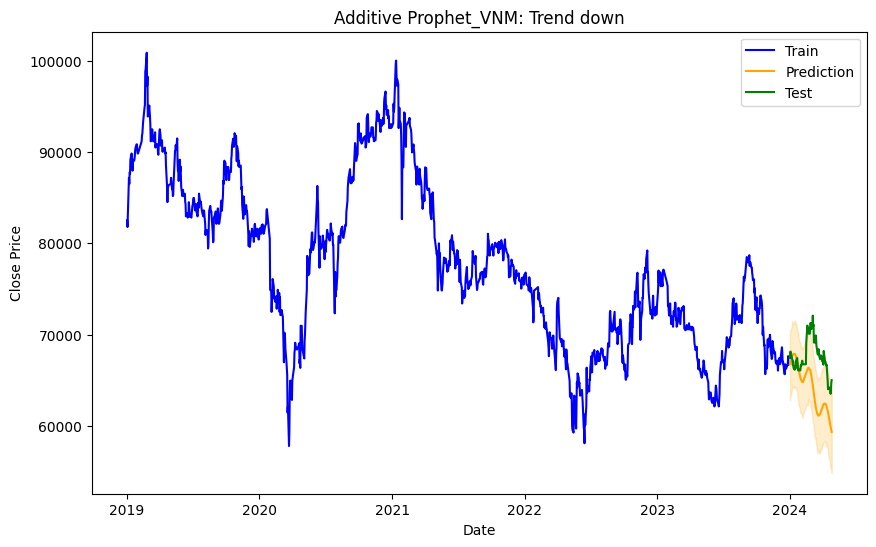

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/4qiuf2h6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/kdkaxv19.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81431', 'data', 'file=/tmp/tmp5rkaockg/4qiuf2h6.json', 'init=/tmp/tmp5rkaockg/kdkaxv19.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model_zv0y454/prophet_model-20240803162102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): SAB


16:21:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2992.01, RMSE: 3888.5


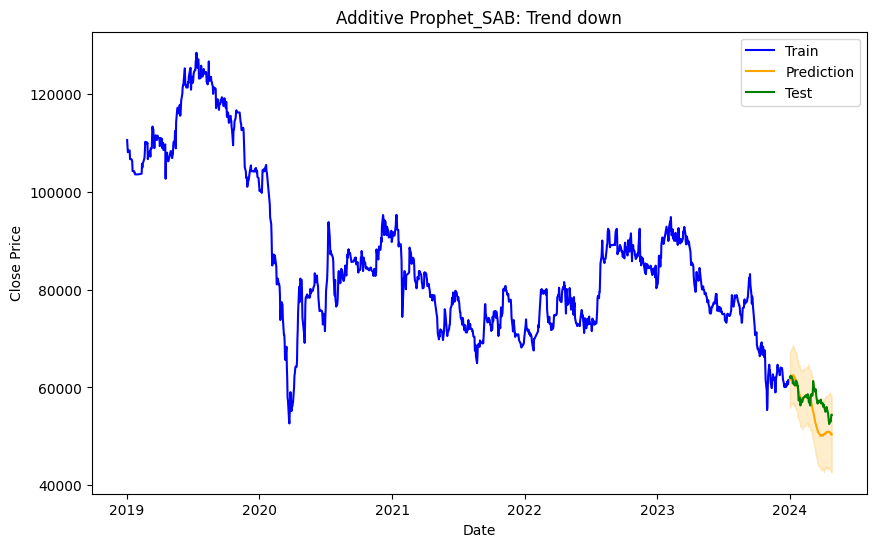

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/qvwifjs0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/z9dwwlks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2367', 'data', 'file=/tmp/tmp5rkaockg/qvwifjs0.json', 'init=/tmp/tmp5rkaockg/z9dwwlks.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model11w3vr17/prophet_model-20240803162103.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): VJC


16:21:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 2144.75, RMSE: 2436.87


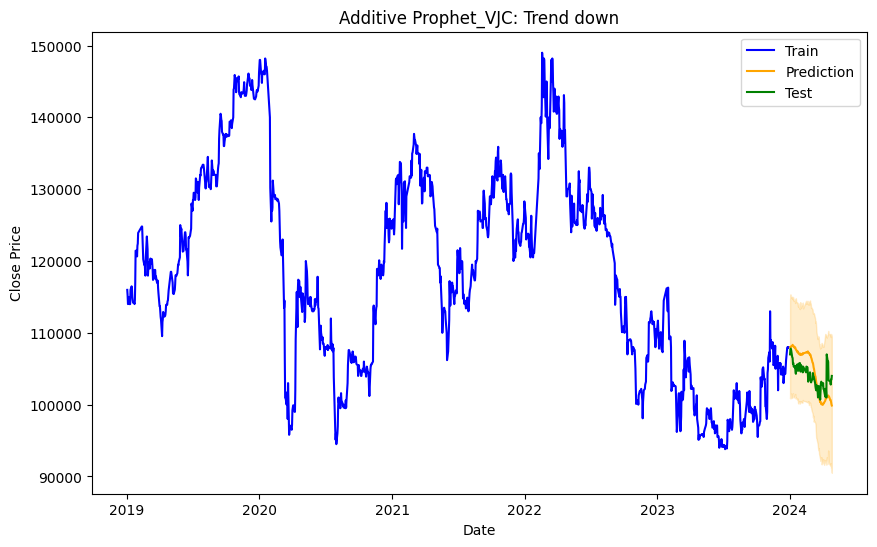

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/v4d8dzia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/p_r0n88o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97004', 'data', 'file=/tmp/tmp5rkaockg/v4d8dzia.json', 'init=/tmp/tmp5rkaockg/p_r0n88o.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model3uy11p7o/prophet_model-20240803162104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Additive): MWG


16:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6351.92, RMSE: 7640.61


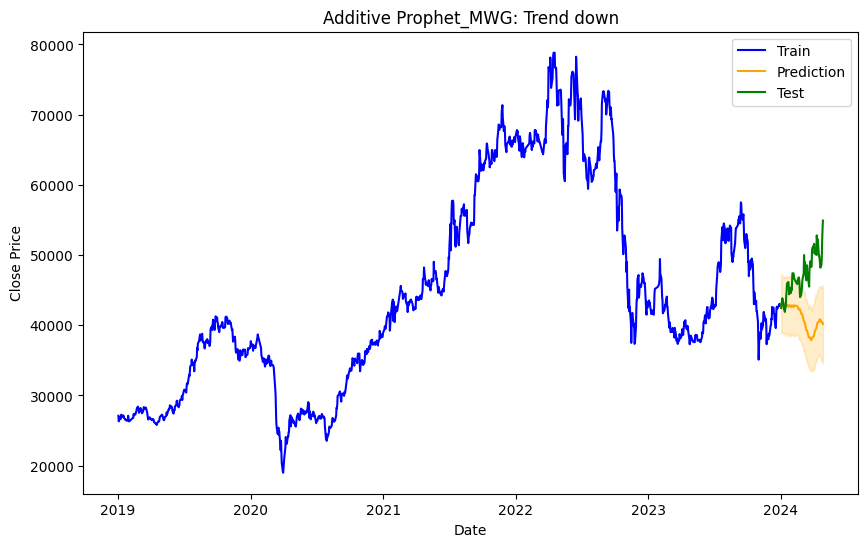

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9gpuj9s2.json


Processing ticker (Additive): PLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7yi8dtnc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27820', 'data', 'file=/tmp/tmp5rkaockg/9gpuj9s2.json', 'init=/tmp/tmp5rkaockg/7yi8dtnc.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelkchz_98l/prophet_model-20240803162106.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1247.97, RMSE: 1627.8


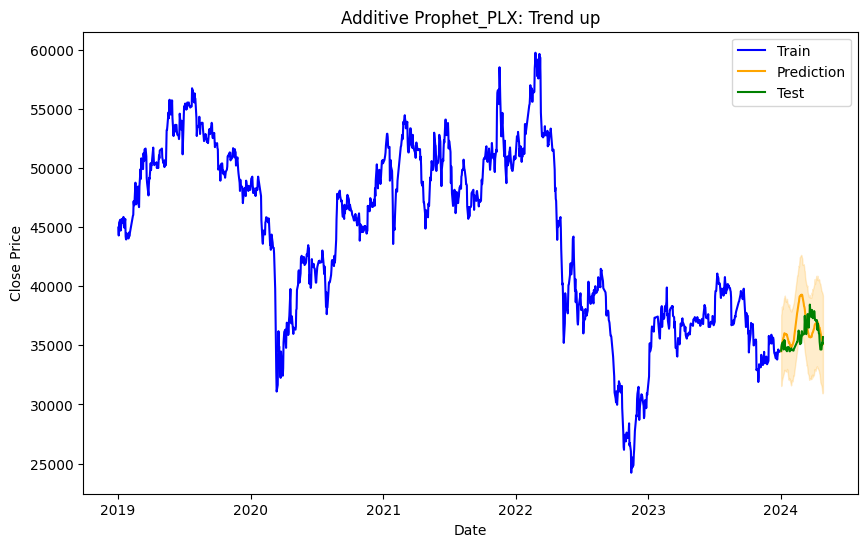

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_jwrb_40.json


Processing ticker (Additive): FPT


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fq4kkzlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60531', 'data', 'file=/tmp/tmp5rkaockg/_jwrb_40.json', 'init=/tmp/tmp5rkaockg/fq4kkzlh.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelfqen1xi3/prophet_model-20240803162108.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 8359.47, RMSE: 10288.79


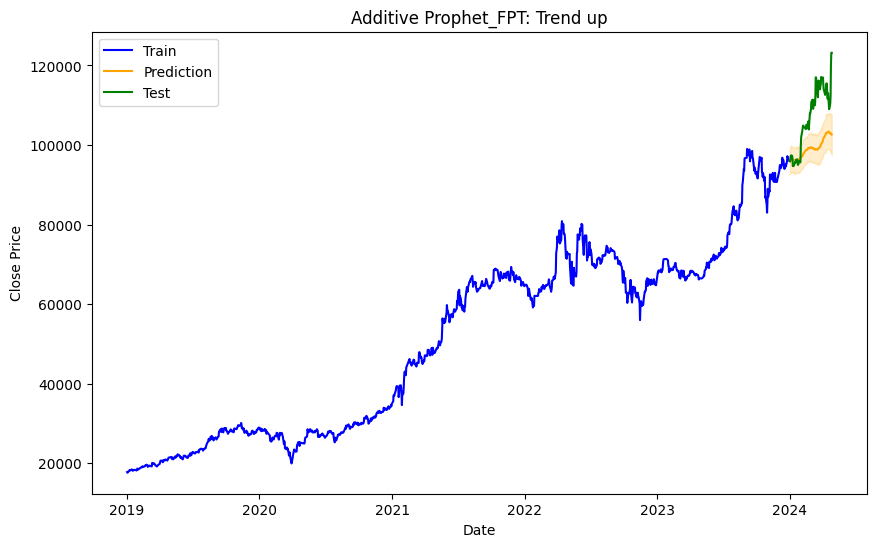

In [ ]:
# Vòng lặp qua từng mã chứng khoán với additive seasonality
for ticker in tickers:
    print(f"Processing ticker (Additive): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_additive = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='additive')

    # Huấn luyện mô hình và dự báo
    forecast_additive = evaluator_additive.fit_and_predict(model_additive, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_additive.plot_forecast(train_df_ticker, forecast_additive, test_df_ticker, ticker, 'Additive')


## Multiplicative

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/1nzm4cbh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/lsl7o0ya.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95204', 'data', 'file=/tmp/tmp5rkaockg/1nzm4cbh.json', 'init=/tmp/tmp5rkaockg/lsl7o0ya.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelamlg_pz1/prophet_model-20240803162111.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSI


16:21:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSI, MAE: 4081.98, RMSE: 4482.82


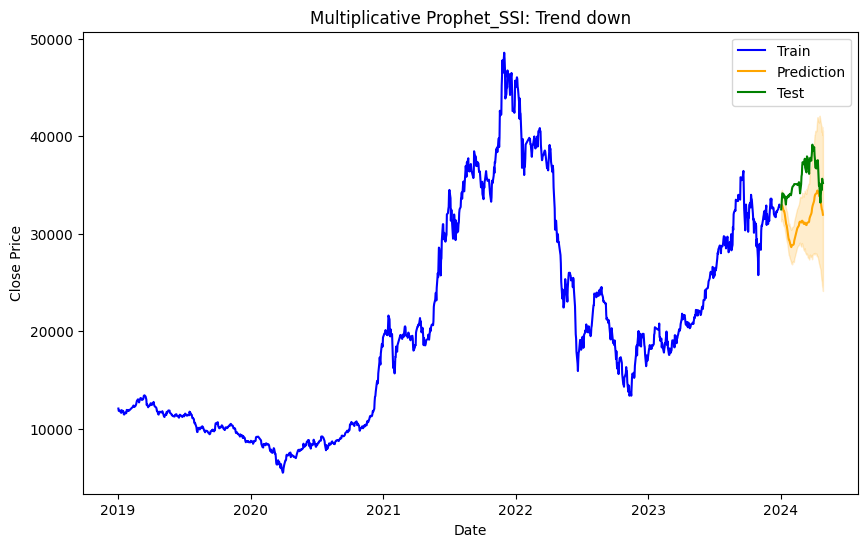

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/k_ujzks3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/i4nuwtms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20203', 'data', 'file=/tmp/tmp5rkaockg/k_ujzks3.json', 'init=/tmp/tmp5rkaockg/i4nuwtms.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeltvh_if2e/prophet_model-20240803162114.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): BCM


16:21:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BCM, MAE: 3715.26, RMSE: 4399.7


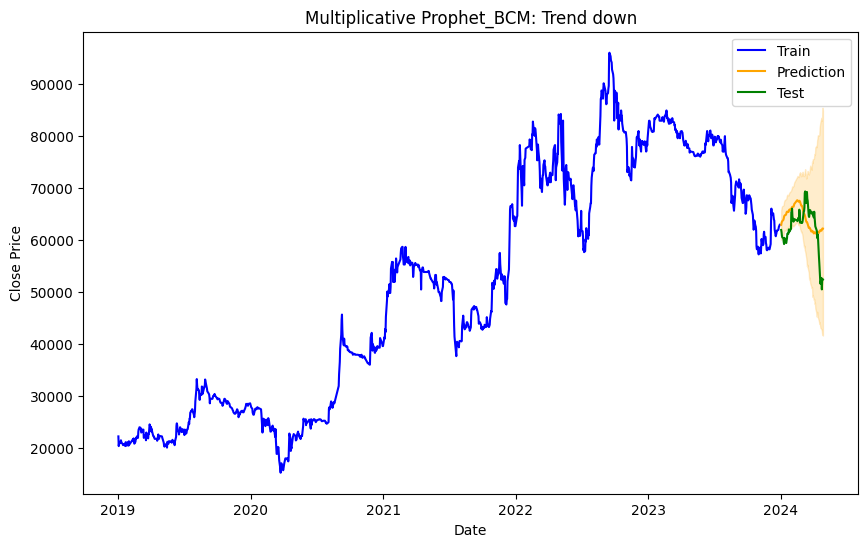

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/z_y733sh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/xexn7bys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36784', 'data', 'file=/tmp/tmp5rkaockg/z_y733sh.json', 'init=/tmp/tmp5rkaockg/xexn7bys.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelm08mxrdu/prophet_model-20240803162117.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VHM


16:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VHM, MAE: 1509.21, RMSE: 1896.66


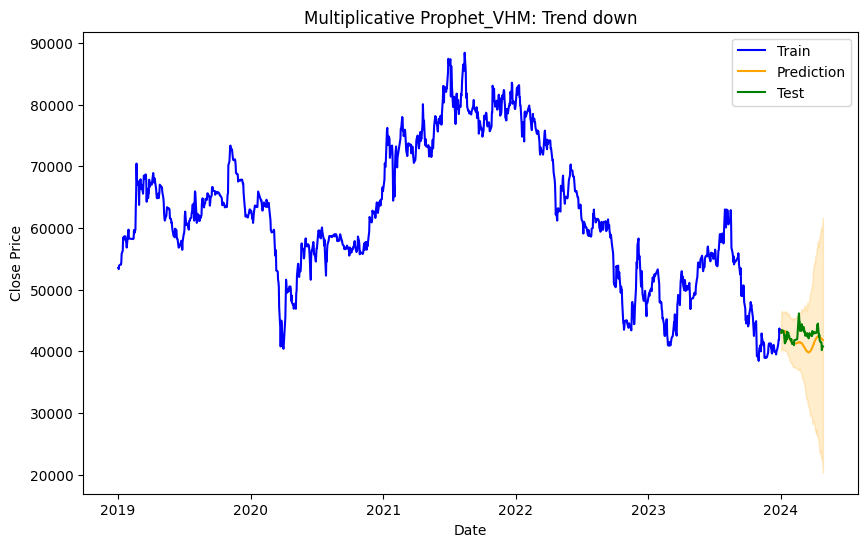

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pbbpu0g2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/csmsl46m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53158', 'data', 'file=/tmp/tmp5rkaockg/pbbpu0g2.json', 'init=/tmp/tmp5rkaockg/csmsl46m.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model4oq_f0in/prophet_model-20240803162119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VIC


16:21:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIC, MAE: 5364.88, RMSE: 6616.43


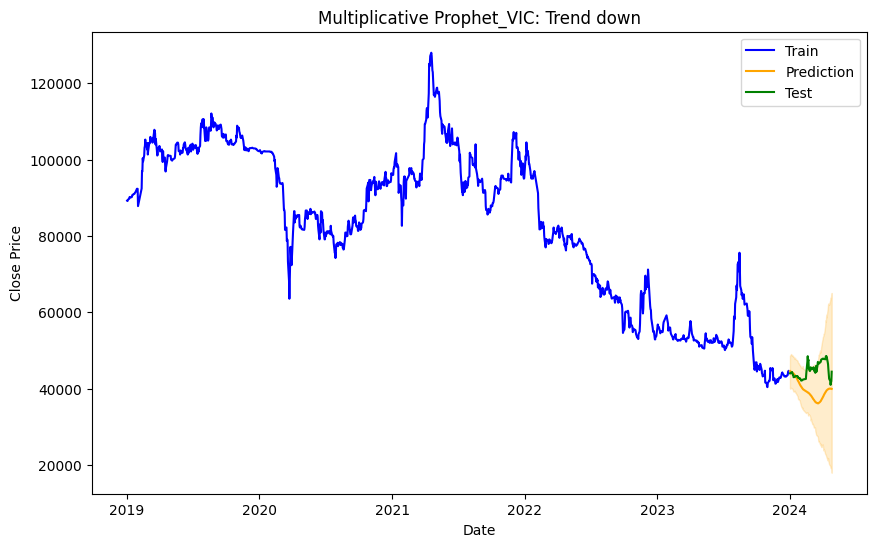

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/by08kent.json


Processing ticker (Multiplicative): VRE


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/tya81mjm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61917', 'data', 'file=/tmp/tmp5rkaockg/by08kent.json', 'init=/tmp/tmp5rkaockg/tya81mjm.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelf0zsw9qf/prophet_model-20240803162123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VRE, MAE: 1775.66, RMSE: 2194.06


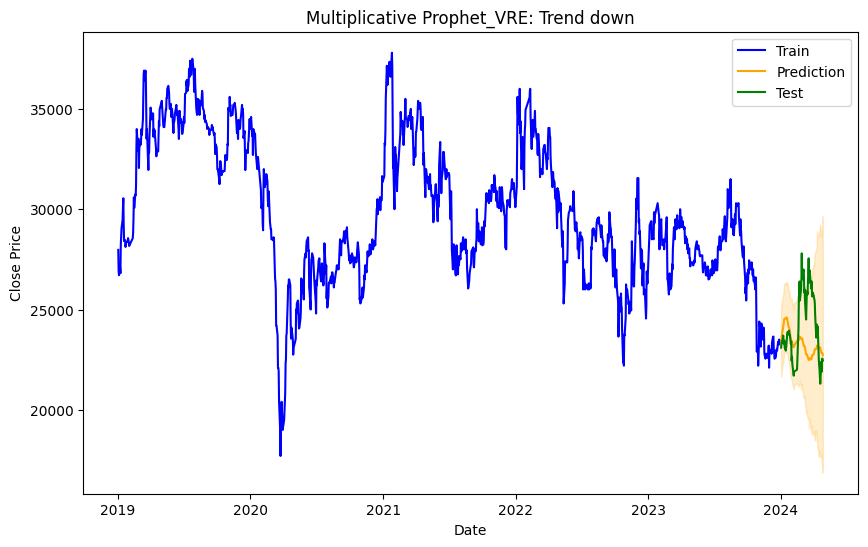

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/88w1r5io.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/lbjgz6ua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53644', 'data', 'file=/tmp/tmp5rkaockg/88w1r5io.json', 'init=/tmp/tmp5rkaockg/lbjgz6ua.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeln6c76xxj/prophet_model-20240803162126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:26 - cmdstanpy - INFO - Chain [1] start processing


Processing ticker (Multiplicative): BVH


INFO:cmdstanpy:Chain [1] start processing
16:21:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BVH, MAE: 3065.2, RMSE: 3692.34


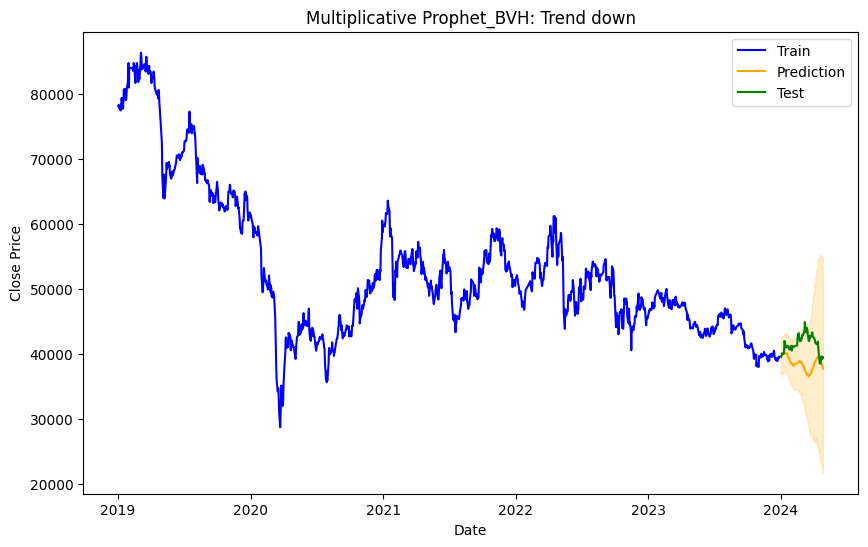

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/wam_y9zp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/hu_744w2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58412', 'data', 'file=/tmp/tmp5rkaockg/wam_y9zp.json', 'init=/tmp/tmp5rkaockg/hu_744w2.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeldnwyaco1/prophet_model-20240803162129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): POW


16:21:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: POW, MAE: 547.7, RMSE: 652.53


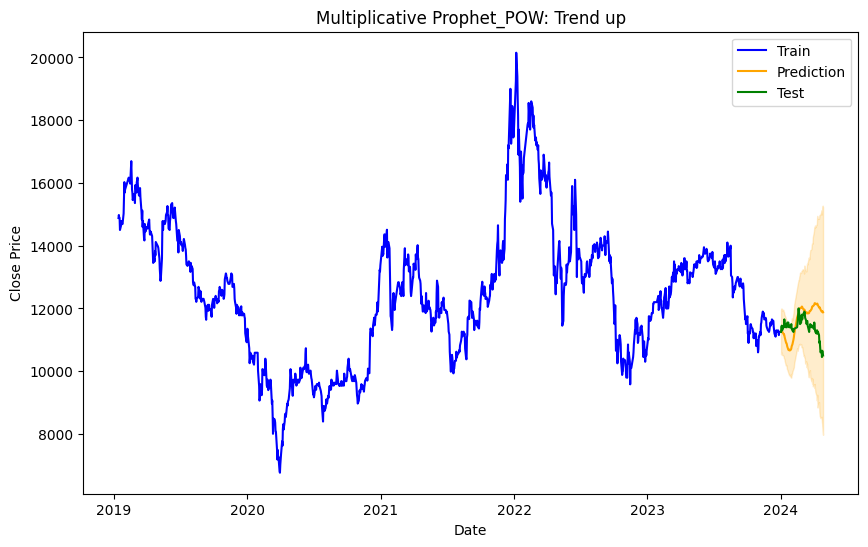

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/sc5mzopt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/nj60mxyy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84237', 'data', 'file=/tmp/tmp5rkaockg/sc5mzopt.json', 'init=/tmp/tmp5rkaockg/nj60mxyy.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0qywx0lf/prophet_model-20240803162132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): GAS


16:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GAS, MAE: 4265.03, RMSE: 5712.69


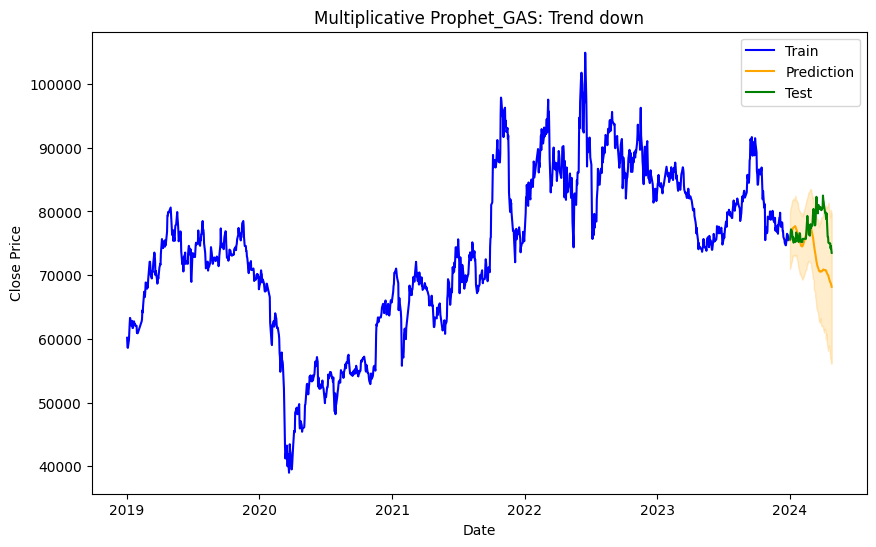

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mqjxdwce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/upk9fom_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68312', 'data', 'file=/tmp/tmp5rkaockg/mqjxdwce.json', 'init=/tmp/tmp5rkaockg/upk9fom_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0grwft18/prophet_model-20240803162135.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): ACB


16:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: ACB, MAE: 1782.81, RMSE: 1906.89


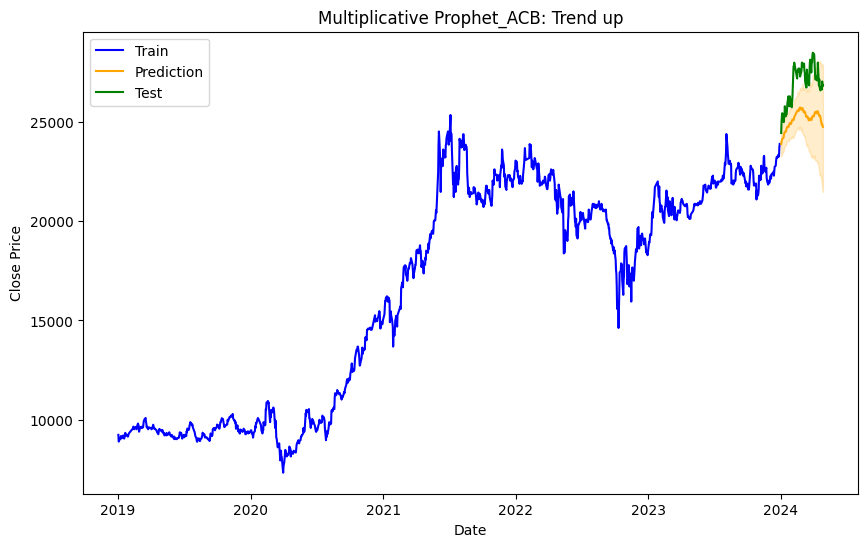

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gqx2w4m5.json


Processing ticker (Multiplicative): BID


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/107y5t6e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1980', 'data', 'file=/tmp/tmp5rkaockg/gqx2w4m5.json', 'init=/tmp/tmp5rkaockg/107y5t6e.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modele5egvvyf/prophet_model-20240803162139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: BID, MAE: 3074.02, RMSE: 3879.52


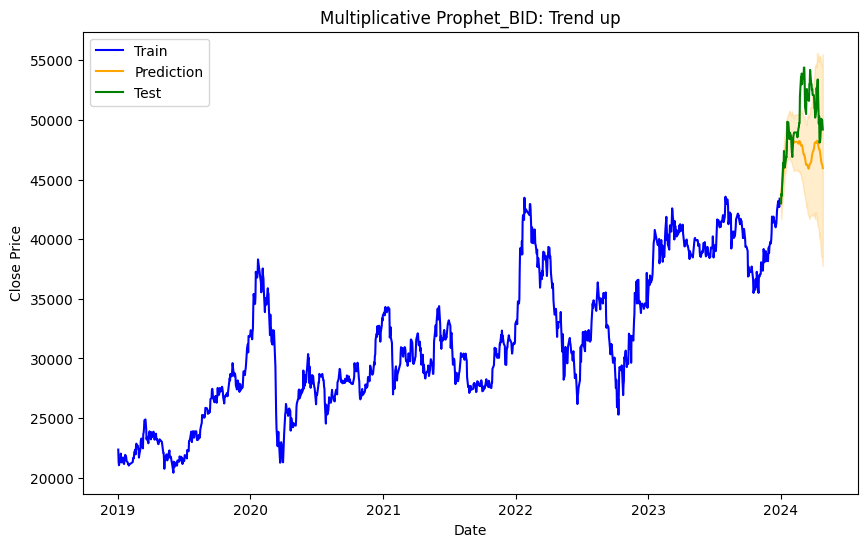

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/71or6dr3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mn_ji8lu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19508', 'data', 'file=/tmp/tmp5rkaockg/71or6dr3.json', 'init=/tmp/tmp5rkaockg/mn_ji8lu.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modell2e9mylw/prophet_model-20240803162143.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): CTG


16:21:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: CTG, MAE: 5824.84, RMSE: 6239.16


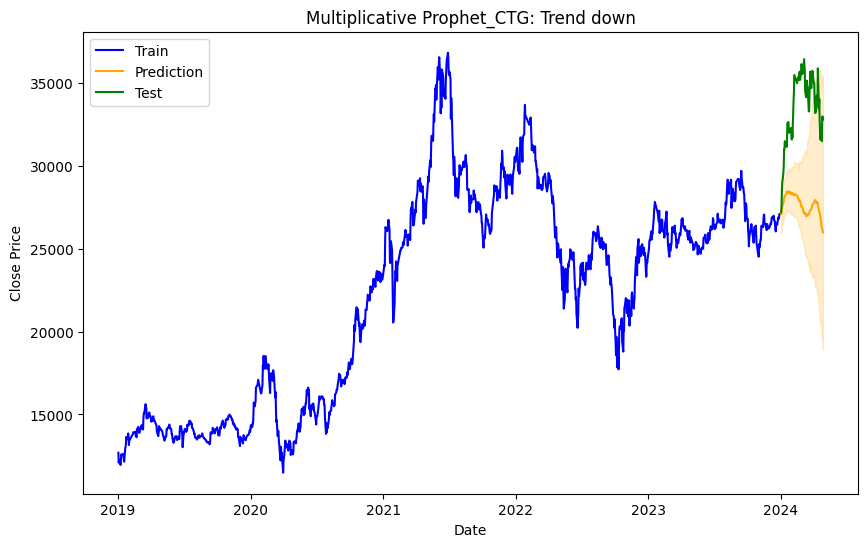

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/yobi9ek1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/uxrfrt11.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25108', 'data', 'file=/tmp/tmp5rkaockg/yobi9ek1.json', 'init=/tmp/tmp5rkaockg/uxrfrt11.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelhoif_y6d/prophet_model-20240803162146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HDB


16:21:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HDB, MAE: 1109.71, RMSE: 1319.65


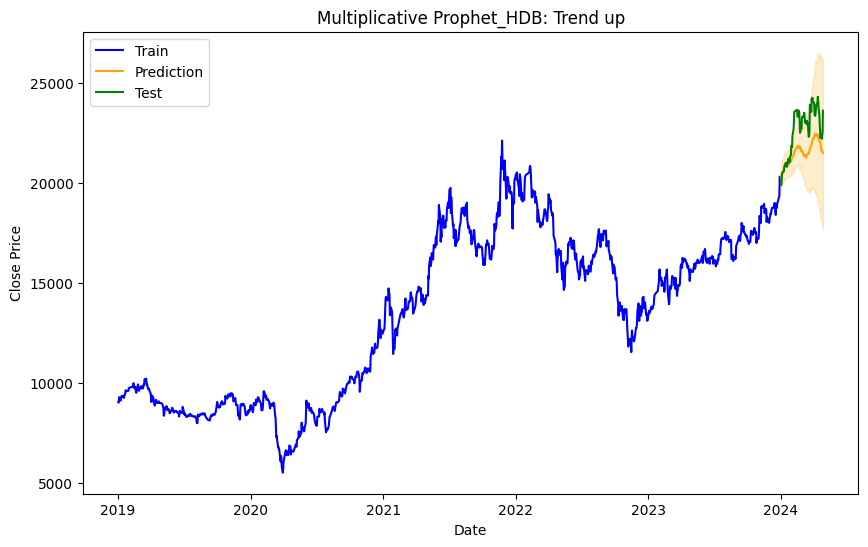

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/co_k1ugi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/lyu77nh_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26045', 'data', 'file=/tmp/tmp5rkaockg/co_k1ugi.json', 'init=/tmp/tmp5rkaockg/lyu77nh_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelqy4p_m3p/prophet_model-20240803162148.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): MBB


16:21:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MBB, MAE: 3944.28, RMSE: 4276.6


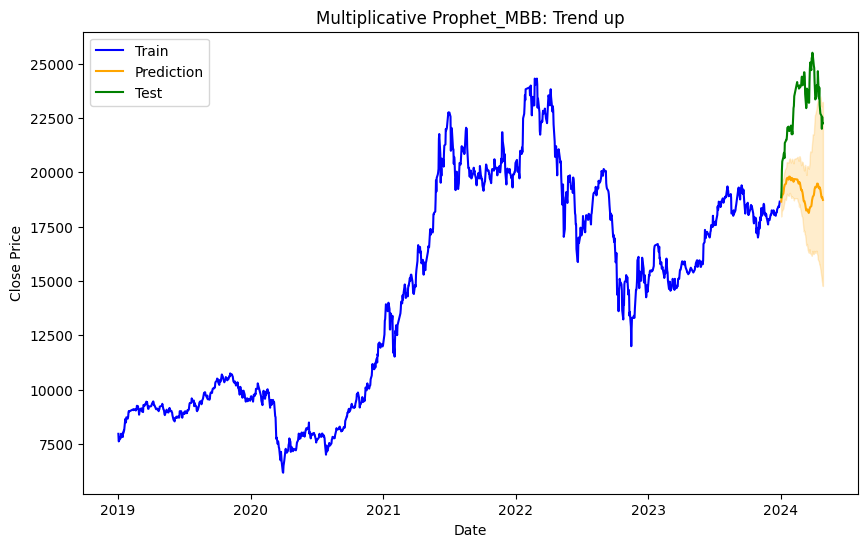

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5ev4jw0w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/hgfbxz8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37115', 'data', 'file=/tmp/tmp5rkaockg/5ev4jw0w.json', 'init=/tmp/tmp5rkaockg/hgfbxz8c.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeldp3j6we7/prophet_model-20240803162151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SSB


16:21:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SSB, MAE: 1906.95, RMSE: 2186.15


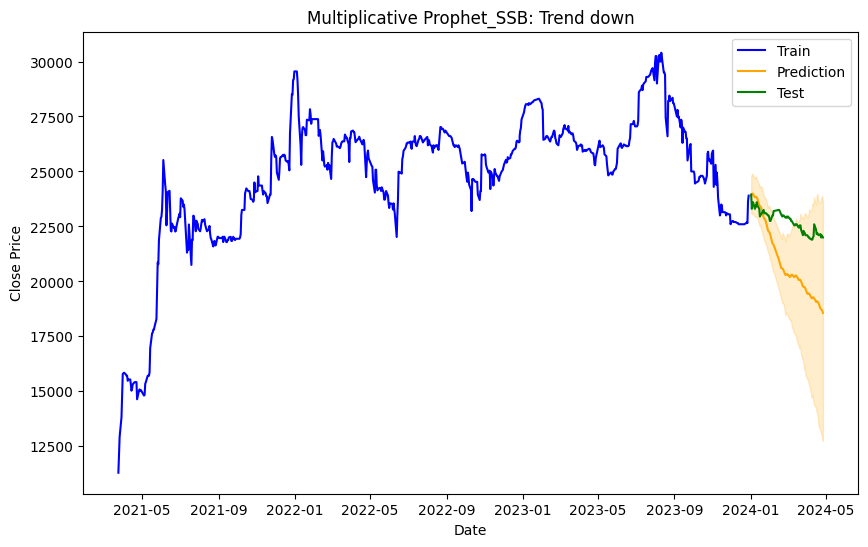

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/_r4gunr9.json


Processing ticker (Multiplicative): SHB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vslbq7_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65570', 'data', 'file=/tmp/tmp5rkaockg/_r4gunr9.json', 'init=/tmp/tmp5rkaockg/vslbq7_c.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeljad6z7n4/prophet_model-20240803162154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SHB, MAE: 1025.23, RMSE: 1126.93


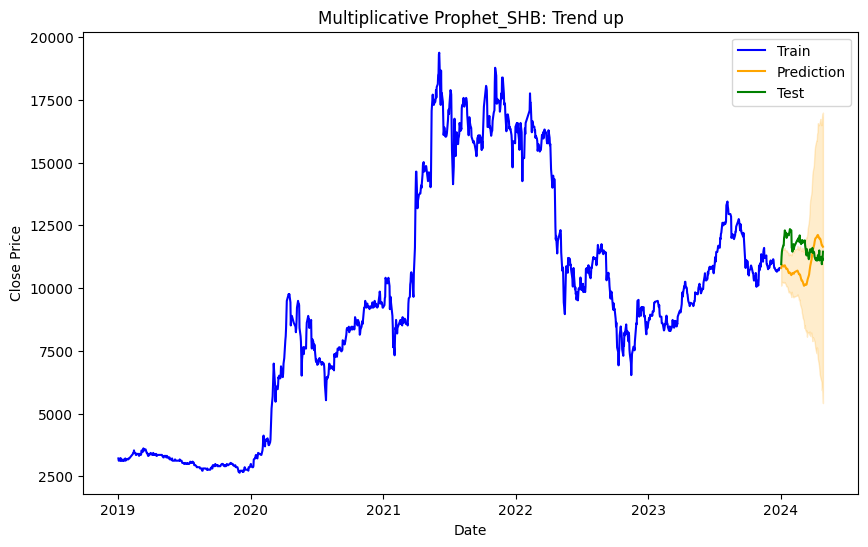

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pkjiyacg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/j9jxpgj0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26785', 'data', 'file=/tmp/tmp5rkaockg/pkjiyacg.json', 'init=/tmp/tmp5rkaockg/j9jxpgj0.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelus7by4tx/prophet_model-20240803162158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): STB


16:22:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: STB, MAE: 1599.45, RMSE: 1971.16


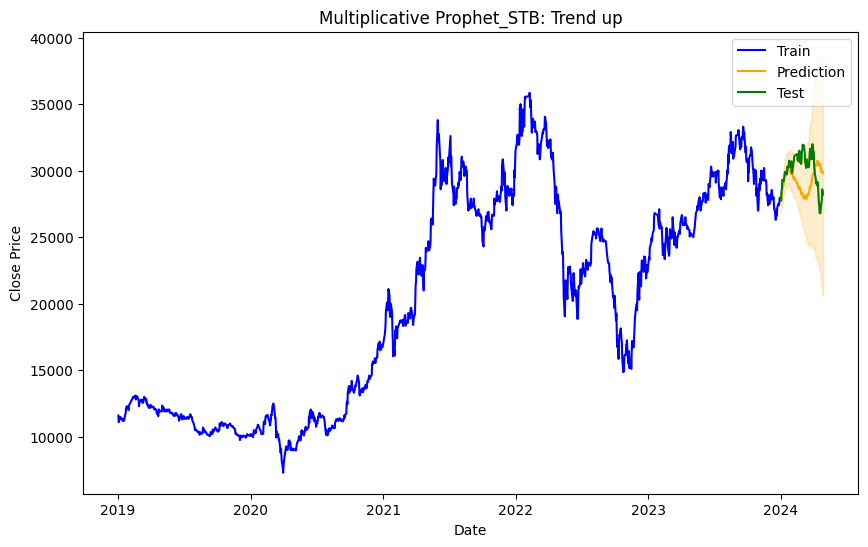

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/99803ty9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/q0tebbyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75826', 'data', 'file=/tmp/tmp5rkaockg/99803ty9.json', 'init=/tmp/tmp5rkaockg/q0tebbyf.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelyjc2yw9v/prophet_model-20240803162201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): TCB


16:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TCB, MAE: 8218.53, RMSE: 9538.05


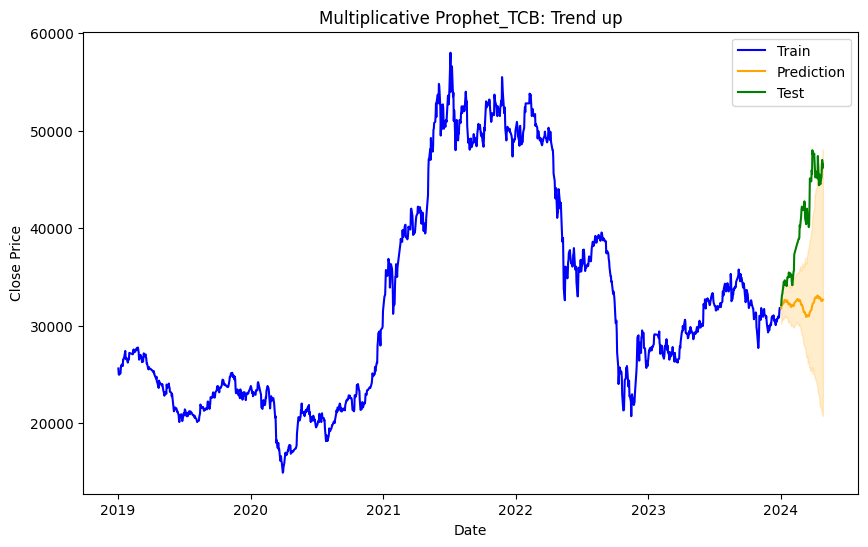

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/o40gc1mk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vmwvqhm9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10308', 'data', 'file=/tmp/tmp5rkaockg/o40gc1mk.json', 'init=/tmp/tmp5rkaockg/vmwvqhm9.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelbl566k8n/prophet_model-20240803162204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): TPB


16:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: TPB, MAE: 908.18, RMSE: 1056.13


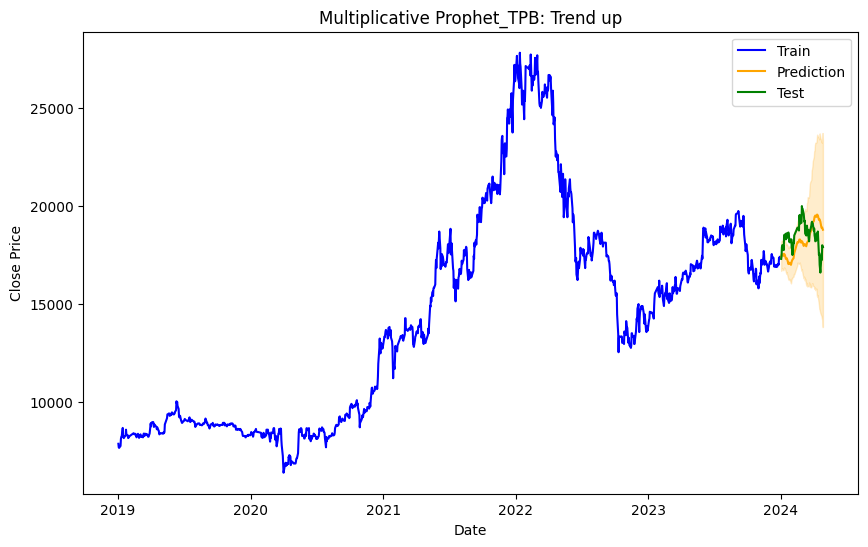

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/fndsobet.json


Processing ticker (Multiplicative): VCB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/gscc8_n7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33437', 'data', 'file=/tmp/tmp5rkaockg/fndsobet.json', 'init=/tmp/tmp5rkaockg/gscc8_n7.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelcr2acuz7/prophet_model-20240803162207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VCB, MAE: 6213.08, RMSE: 7196.42


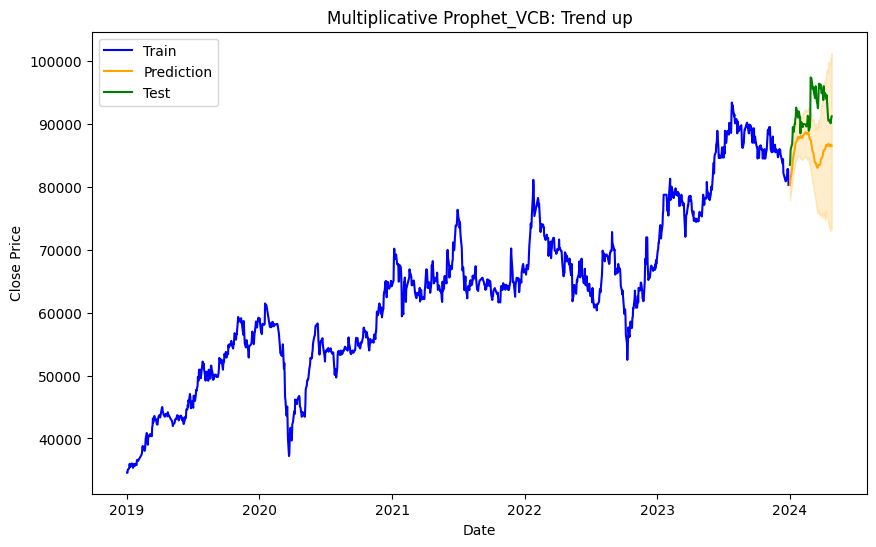

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/10s84lcn.json


Processing ticker (Multiplicative): VIB


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/wa0356vo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83370', 'data', 'file=/tmp/tmp5rkaockg/10s84lcn.json', 'init=/tmp/tmp5rkaockg/wa0356vo.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model0rwvnlrc/prophet_model-20240803162211.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VIB, MAE: 1775.35, RMSE: 2043.11


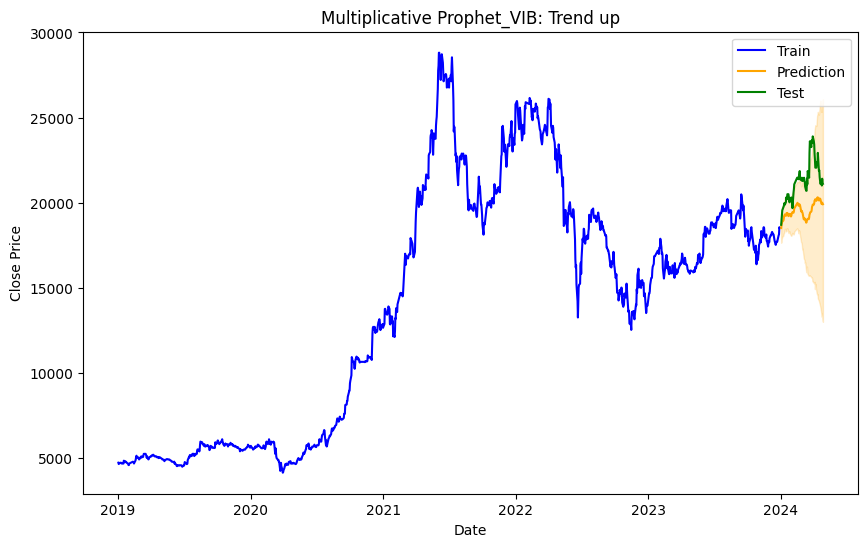

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/aurr0rr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/u7soyfke.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65119', 'data', 'file=/tmp/tmp5rkaockg/aurr0rr5.json', 'init=/tmp/tmp5rkaockg/u7soyfke.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelaib7p6rw/prophet_model-20240803162214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VPB


16:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VPB, MAE: 1103.37, RMSE: 1493.9


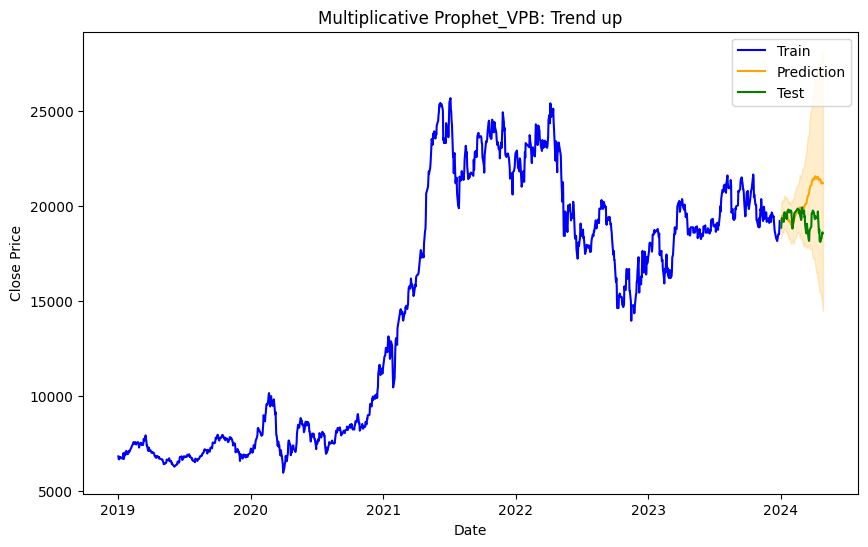

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/cqmijd_x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/5g4t5lz5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10579', 'data', 'file=/tmp/tmp5rkaockg/cqmijd_x.json', 'init=/tmp/tmp5rkaockg/5g4t5lz5.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelw2du0i_0/prophet_model-20240803162218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): HPG


16:22:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: HPG, MAE: 1324.31, RMSE: 1608.99


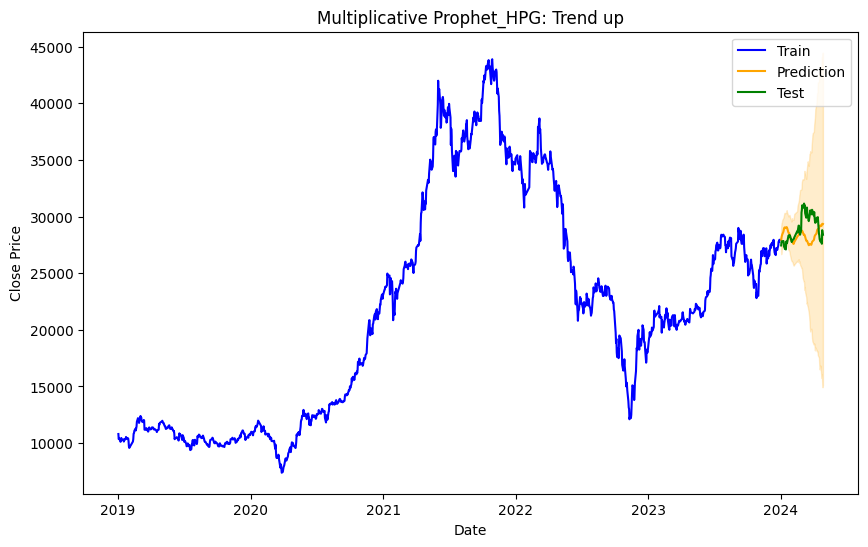

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/vzdzyyvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/in9stjtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67066', 'data', 'file=/tmp/tmp5rkaockg/vzdzyyvj.json', 'init=/tmp/tmp5rkaockg/in9stjtz.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeljou17391/prophet_model-20240803162221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): GVR


16:22:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: GVR, MAE: 7335.58, RMSE: 8513.12


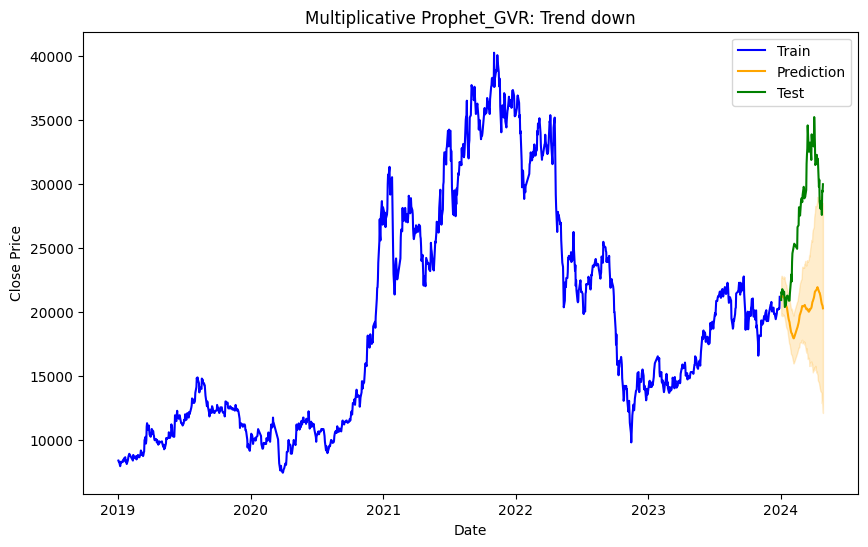

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/mypcsltp.json


Processing ticker (Multiplicative): MSN


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/8vqop3p_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51977', 'data', 'file=/tmp/tmp5rkaockg/mypcsltp.json', 'init=/tmp/tmp5rkaockg/8vqop3p_.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeldsxfk2p4/prophet_model-20240803162225.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MSN, MAE: 14124.15, RMSE: 16737.98


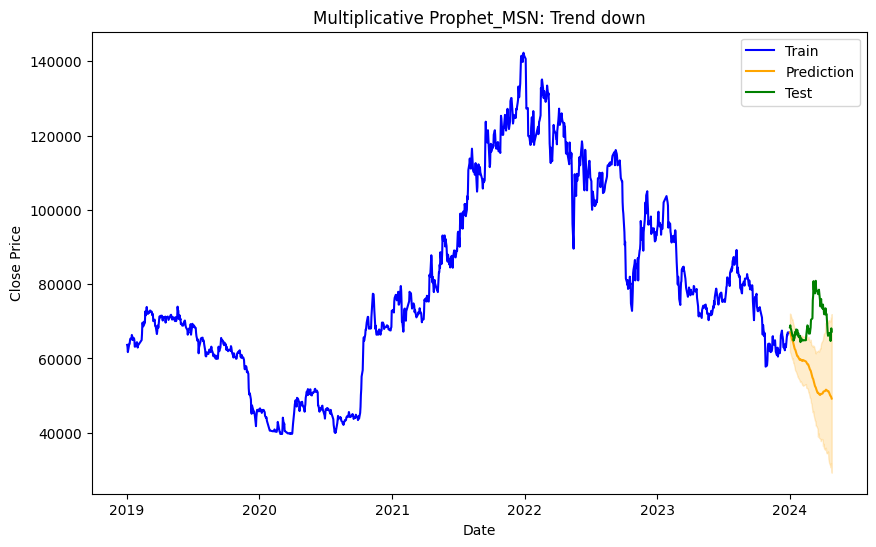

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/dyvv_ktu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/857kb8nu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43160', 'data', 'file=/tmp/tmp5rkaockg/dyvv_ktu.json', 'init=/tmp/tmp5rkaockg/857kb8nu.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model800aps8g/prophet_model-20240803162229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VNM


16:22:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VNM, MAE: 4703.0, RMSE: 5547.66


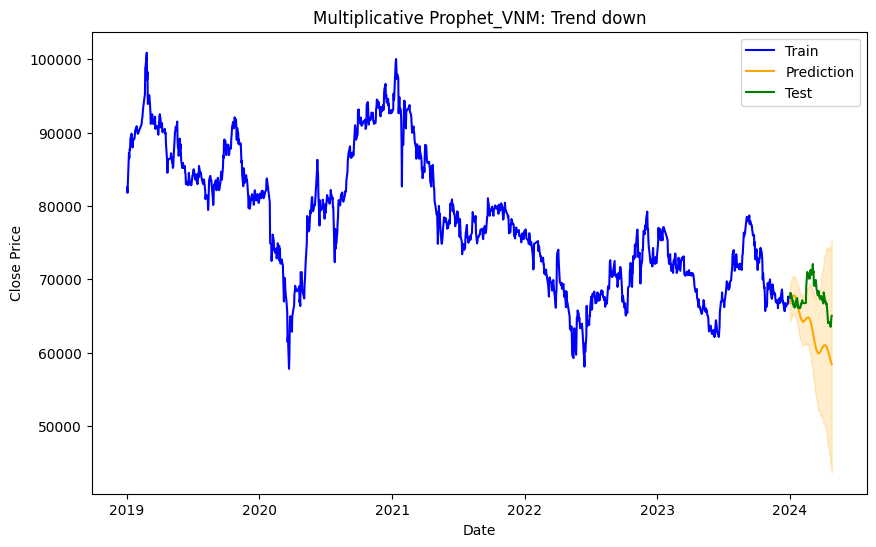

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/qe9ljs0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7rh_hfot.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76831', 'data', 'file=/tmp/tmp5rkaockg/qe9ljs0l.json', 'init=/tmp/tmp5rkaockg/7rh_hfot.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modell8sq15m9/prophet_model-20240803162232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): SAB


16:22:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: SAB, MAE: 2184.52, RMSE: 2769.06


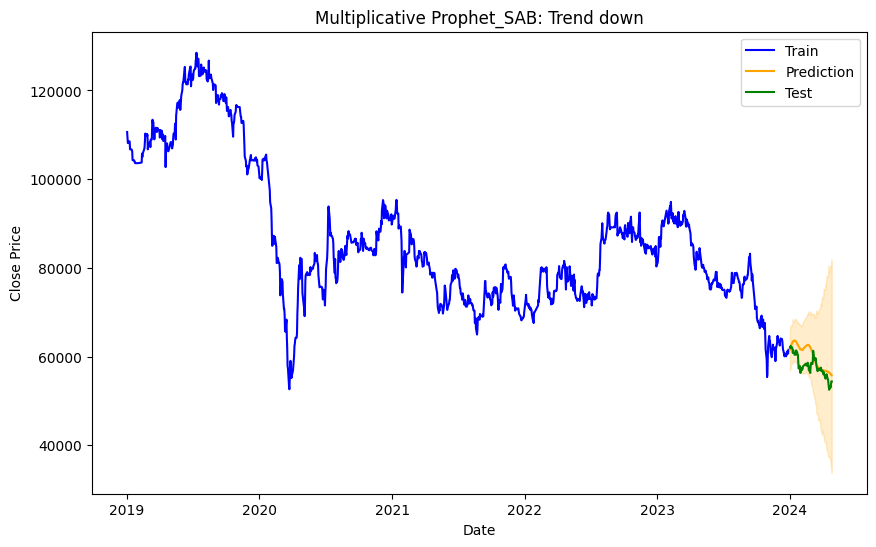

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/g9n1cytg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rq2e36bd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37115', 'data', 'file=/tmp/tmp5rkaockg/g9n1cytg.json', 'init=/tmp/tmp5rkaockg/rq2e36bd.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_model6pswjasn/prophet_model-20240803162235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): VJC


16:22:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: VJC, MAE: 3342.27, RMSE: 4027.08


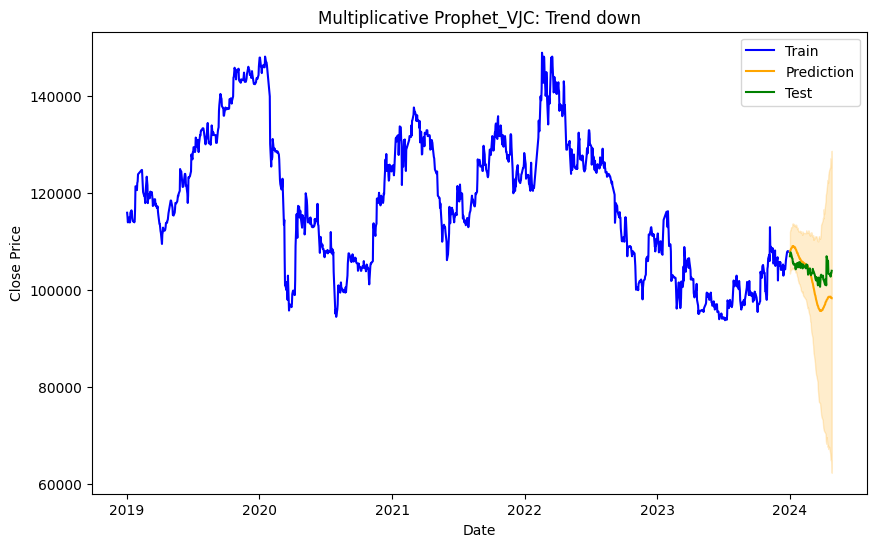

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/7h_6ffv8.json


Processing ticker (Multiplicative): MWG


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/rfq1yw_m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49919', 'data', 'file=/tmp/tmp5rkaockg/7h_6ffv8.json', 'init=/tmp/tmp5rkaockg/rfq1yw_m.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelwca5plb9/prophet_model-20240803162239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: MWG, MAE: 6892.72, RMSE: 8019.76


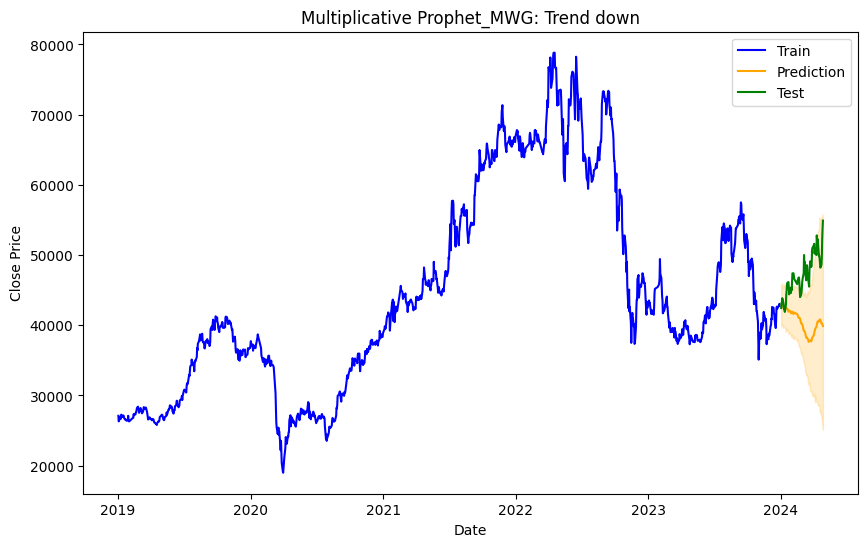

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/r60z4px_.json


Processing ticker (Multiplicative): PLX


DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/pvq_ypnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75444', 'data', 'file=/tmp/tmp5rkaockg/r60z4px_.json', 'init=/tmp/tmp5rkaockg/pvq_ypnx.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modeliqyp8sf2/prophet_model-20240803162244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: PLX, MAE: 1415.72, RMSE: 1699.6


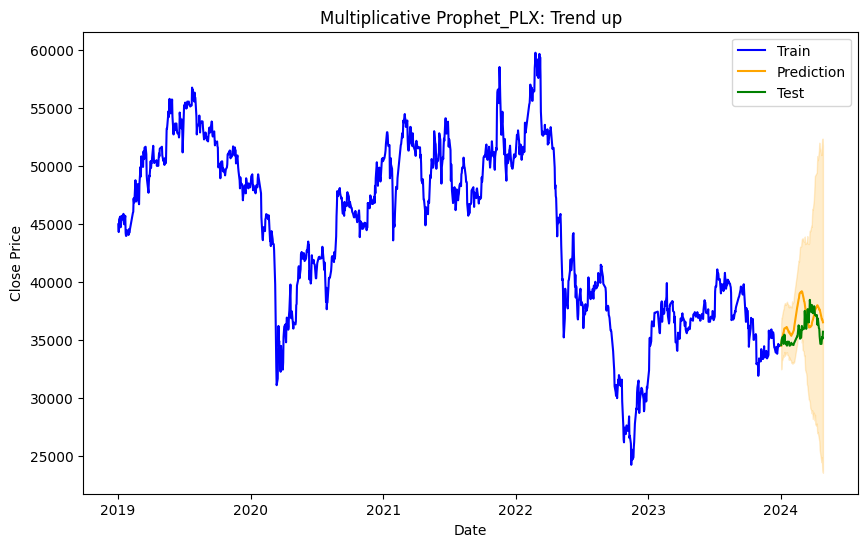

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/9_5b94d8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5rkaockg/geccmbql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45896', 'data', 'file=/tmp/tmp5rkaockg/9_5b94d8.json', 'init=/tmp/tmp5rkaockg/geccmbql.json', 'output', 'file=/tmp/tmp5rkaockg/prophet_modelr_qm1n81/prophet_model-20240803162249.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:22:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Processing ticker (Multiplicative): FPT


16:22:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Ticker: FPT, MAE: 12505.95, RMSE: 15363.96


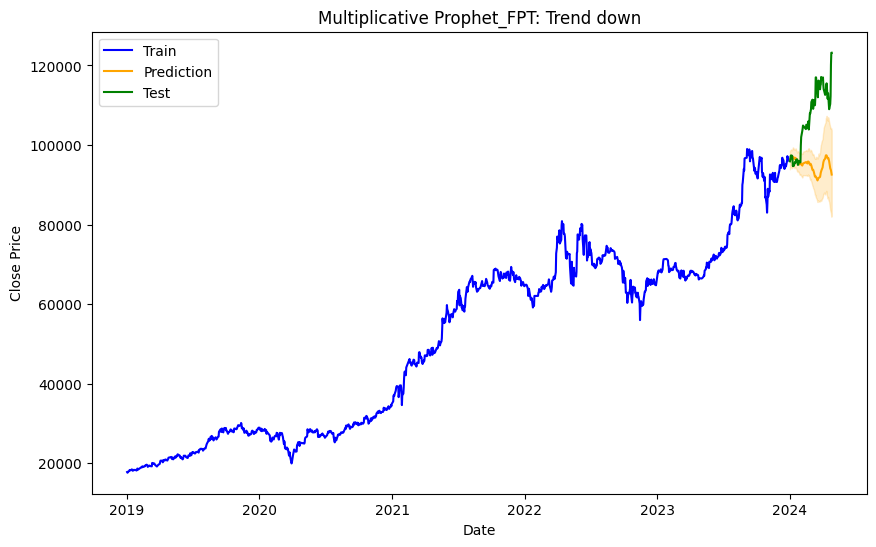

In [ ]:

# Vòng lặp qua từng mã chứng khoán với multiplicative seasonality
for ticker in tickers:
    print(f"Processing ticker (Multiplicative): {ticker}")

    # Chuẩn bị dữ liệu cho từng mã chứng khoán
    train_df_ticker = train_df[train_df['ticker'] == ticker]
    test_df_ticker = test_df[test_df['ticker'] == ticker]

    # Đổi tên cột cho phù hợp với yêu cầu của Prophet
    train_df_ticker = train_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})
    test_df_ticker = test_df_ticker.rename(columns={'time': 'ds', 'close': 'y'})

    # Chỉ lấy các cột cần thiết
    train_df_ticker = train_df_ticker[['ds', 'y']]
    test_df_ticker = test_df_ticker[['ds', 'y']]

    # Tạo mô hình Prophet với các thành phần mùa vụ hàng tuần và hàng năm
    model_multiplicative = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative')

    # Huấn luyện mô hình và dự báo
    forecast_multiplicative = evaluator_multiplicative.fit_and_predict(model_multiplicative, train_df_ticker, test_df_ticker, ticker)

    # Vẽ biểu đồ dự báo
    evaluator_multiplicative.plot_forecast(train_df_ticker, forecast_multiplicative, test_df_ticker, ticker, 'Multiplicative')


In [ ]:
# Lấy và hiển thị kết quả
results_df_additive, avg_mae_additive, avg_rmse_additive = evaluator_additive.get_results('additive')
results_df_multiplicative, avg_mae_multiplicative, avg_rmse_multiplicative = evaluator_multiplicative.get_results('multiplicative')

print("Additive Results:")
print(results_df_additive)
print(f'Average MAE (Additive): {avg_mae_additive}, Average RMSE (Additive): {avg_rmse_additive}')

print("Multiplicative Results:")
print(results_df_multiplicative)
print(f'Average MAE (Multiplicative): {avg_mae_multiplicative}, Average RMSE (Multiplicative): {avg_rmse_multiplicative}')



Average MAE (Additive): 3358.7, Average RMSE (Additive): 4003.01
Average MAE (Multiplicative): 3887.96, Average RMSE (Multiplicative): 4605.6
Additive Results:
   ticker       mae      rmse seasonality_mode
0     SSI   1531.85   1783.62         additive
1     BCM   3813.82   4323.65         additive
2     VHM   1301.49   1651.37         additive
3     VIC   3834.42   4917.44         additive
4     VRE   1686.07   1976.67         additive
5     BVH   3427.81   3956.37         additive
6     POW    189.98    244.24         additive
7     GAS   4600.38   6024.80         additive
8     ACB   2142.07   2259.26         additive
9     BID   4879.13   5675.99         additive
10    CTG   5226.09   5538.13         additive
11    HDB   1587.30   1850.21         additive
12    MBB   3432.73   3652.41         additive
13    SSB   1081.33   1199.97         additive
14    SHB   1062.76   1257.87         additive
15    STB    938.67   1505.47         additive
16    TCB   6794.14   8229.12         add